In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

In [10]:
lyft2 = pd.read_csv('../data/lyft_data_51116.csv', parse_dates=['record_time'])
lyft2['primetime_percentage'].unique()

array(['0%', '25%', '50%', '75%', '100%', '150%', nan, '200%', '250%',
       '300%', '350%', '500%', '400%'], dtype=object)

In [11]:
lyft2['primetime_percentage'] = lyft2['primetime_percentage'].fillna('0%').apply(lambda x: int(x[:-1]))
lyft2['primetime_percentage'].head()

0     0
1     0
2     0
3    25
4    25
Name: primetime_percentage, dtype: int64

In [12]:
lyft = pd.read_csv('../data/lyft_data_51116.csv', parse_dates=['record_time'])
lyft.set_index('record_time', inplace=True)
lyft.index = lyft.index - pd.Timedelta(hours=7)
lyft['hour'] = lyft.index.hour
lyft['date'] = lyft.index.date
lyft['dayofweek'] = lyft.index.dayofweek
lyft['weekofyear'] = lyft.index.weekofyear
lyft['primetime_percentage'] = lyft['primetime_percentage'].fillna('0%').apply(lambda x: int(x[:-1]))
lyft = lyft.groupby(['date','hour','city','ride_type']).mean().reset_index()
lyft['record_time'] = pd.to_datetime(lyft['date'].astype(str) + ' ' + lyft['hour'].astype(str) + ":00:00")
lyft['estimated_cost_cents_min'] = lyft['estimated_cost_cents_min'] / 100.
lyft['estimated_cost_cents_max'] = lyft['estimated_cost_cents_max'] / 100.
lyft.rename(columns={'estimated_cost_cents_min':'est_price_min','estimated_cost_cents_max':'est_price_max'}, inplace=True)
lyft.set_index('record_time', inplace=True)
lyft.head()

date  hour     city  ride_type  avg_est_price  \
record_time                                                                
2016-04-06 21:00:00  2016-04-06    21  chicago       lyft      34.306184   
2016-04-06 21:00:00  2016-04-06    21  chicago  lyft_line      28.405000   
2016-04-06 21:00:00  2016-04-06    21  chicago  lyft_plus      48.212632   
2016-04-06 21:00:00  2016-04-06    21   denver       lyft      35.330000   
2016-04-06 21:00:00  2016-04-06    21   denver  lyft_line      32.010000   

                     est_price_min  est_price_max  estimated_distance_miles  \
record_time                                                                   
2016-04-06 21:00:00      29.152895      39.459474                     19.26   
2016-04-06 21:00:00      28.405000      28.405000                     19.26   
2016-04-06 21:00:00      40.975526      55.449737                     19.26   
2016-04-06 21:00:00      30.030000      40.630000                     26.07   
2016-04-06 21:00:00      32.010000      32.010000                     26.07   

                     estimated_duration_seconds  eta_seconds     ...      \
record_time                                                      ...       
2016-04-06 21:00:00                      2204.0   132.631579     ...       
2016-04-06 21:00:00                      2204.0   131.052632     ...       
2016-04-06 21:00:00                      2204.0   290.184211     ...       
2016-04-06 21:00:00                      2200.0   101.052632     ...       
2016-04-06 21:00:00                      2200.0   101.052632     ...       

                     num_drivers  primetime_percentage  seats  \
record_time                                                     
2016-04-06 21:00:00          8.0              2.631579    4.0   
2016-04-06 21:00:00          8.0              2.631579    2.0   
2016-04-06 21:00:00          8.0              2.631579    6.0   
2016-04-06 21:00:00          8.0              0.000000    4.0   
2016-04-06 21:00:00          8.0              0.000000    NaN   

                     trust_and_service  start_latitude  start_longitude  \
record_time                                                               
2016-04-06 21:00:00              160.0       41.877688       -87.630413   
2016-04-06 21:00:00              160.0       41.877688       -87.630413   
2016-04-06 21:00:00              160.0       41.877688       -87.630413   
2016-04-06 21:00:00              195.0       39.740782      -104.991153   
2016-04-06 21:00:00                NaN       39.740782      -104.991153   

                     stop_latitude  stop_longitude  dayofweek  weekofyear  
record_time                                                                
2016-04-06 21:00:00      41.973551      -87.909057          2          14  
2016-04-06 21:00:00      41.973551      -87.909057          2          14  
2016-04-06 21:00:00      41.973551      -87.909057          2          14  
2016-04-06 21:00:00      39.851727     -104.673804          2          14  
2016-04-06 21:00:00      39.851727     -104.673804          2          14  

[5 rows x 25 columns]

In [13]:
uber = pd.read_csv('../data/organized_uber_50916.csv', parse_dates=['record_time'])
uber.set_index('record_time', inplace=True)
uber.index = uber.index - pd.Timedelta(hours=7)
uber['hour'] = uber.index.hour
uber['date'] = uber.index.date
uber['dayofweek'] = uber.index.dayofweek
uber['weekofyear'] = uber.index.weekofyear
uber = uber.groupby(['date','hour','city','display_name']).mean().reset_index()
uber['record_time'] = pd.to_datetime(uber['date'].astype(str) + ' ' + uber['hour'].astype(str) + ":00:00")
uber.set_index('record_time', inplace=True)
uber.head()

date  hour     city display_name  low_estimate  \
record_time                                                                 
2016-02-15 08:00:00  2016-02-15     8  chicago    uberBLACK          68.0   
2016-02-15 08:00:00  2016-02-15     8  chicago  uberESPANOL          26.0   
2016-02-15 08:00:00  2016-02-15     8  chicago   uberSELECT          49.0   
2016-02-15 08:00:00  2016-02-15     8  chicago      uberSUV          87.0   
2016-02-15 08:00:00  2016-02-15     8  chicago     uberTAXI           NaN   

                     avg_price_est  high_estimate  trip_duration  \
record_time                                                        
2016-02-15 08:00:00           78.5           89.0         1920.0   
2016-02-15 08:00:00           30.0           34.0         1920.0   
2016-02-15 08:00:00           55.5           62.0         1920.0   
2016-02-15 08:00:00           99.5          112.0         1920.0   
2016-02-15 08:00:00            NaN            NaN         1920.0   

                     trip_distance  surge_multiplier     ...      \
record_time                                              ...       
2016-02-15 08:00:00          15.78               1.0     ...       
2016-02-15 08:00:00          15.78               1.0     ...       
2016-02-15 08:00:00          15.78               1.0     ...       
2016-02-15 08:00:00          15.78               1.0     ...       
2016-02-15 08:00:00          15.78               1.0     ...       

                     cost_per_minute  cost_per_distance  cancellation_fee  \
record_time                                                                 
2016-02-15 08:00:00             0.40               3.50              10.0   
2016-02-15 08:00:00             0.20               0.90               5.0   
2016-02-15 08:00:00             0.35               2.00               5.0   
2016-02-15 08:00:00             0.55               4.05              10.0   
2016-02-15 08:00:00              NaN                NaN               NaN   

                     service_fees  start_latitude  start_longitude  \
record_time                                                          
2016-02-15 08:00:00           0.0       41.877688       -87.630413   
2016-02-15 08:00:00           1.2       41.877688       -87.630413   
2016-02-15 08:00:00           1.2       41.877688       -87.630413   
2016-02-15 08:00:00           0.0       41.877688       -87.630413   
2016-02-15 08:00:00           0.0       41.877688       -87.630413   

                     stop_latitude  stop_longitude  dayofweek  weekofyear  
record_time                                                                
2016-02-15 08:00:00      41.973551      -87.909057          0           7  
2016-02-15 08:00:00      41.973551      -87.909057          0           7  
2016-02-15 08:00:00      41.973551      -87.909057          0           7  
2016-02-15 08:00:00      41.973551      -87.909057          0           7  
2016-02-15 08:00:00      41.973551      -87.909057          0           7  

[5 rows x 25 columns]

In [3]:
lyft.describe()

hour  avg_est_price  estimated_cost_cents_min  \
count  12150.000000   12149.000000              12149.000000   
mean      11.446914      46.107724               4122.681108   
std        6.928330      20.808770               1837.136265   
min        0.000000      15.065000                300.000000   
25%        5.000000      30.367667               2770.344828   
50%       11.000000      41.470000               3586.034483   
75%       17.000000      54.600000               4889.444444   
max       23.000000     256.000000              22090.000000   

       estimated_cost_cents_max  estimated_distance_miles  \
count              12149.000000              12149.000000   
mean                5098.863611                 18.066534   
std                 2464.806451                  4.661458   
min                 1699.000000                 13.090345   
25%                 3269.100000                 13.760000   
50%                 4572.000000                 17.940000   
75%                 6115.366667                 19.800000   
max                50000.000000                 26.080000   

       estimated_duration_seconds   eta_seconds   base_charge  cost_minimum  \
count                12149.000000  12149.000000  11937.000000  11937.000000   
mean                  1921.982620    169.092573    210.681729    571.950152   
std                    459.487318    117.612186     87.167601    227.324189   
min                   1353.000000     60.000000     50.000000    300.000000   
25%                   1405.000000     91.034483    135.000000    400.000000   
50%                   2200.000000    128.000000    200.000000    500.000000   
75%                   2204.000000    208.000000    300.000000    700.000000   
max                   2535.966667   1304.000000    350.000000   1200.000000   

       cost_per_mile      ...       cancel_penalty_amount   num_drivers  \
count   11937.000000      ...                11937.000000  12150.000000   
mean      157.485549      ...                  567.856245      7.481097   
std        62.680630      ...                  171.248677      1.332510   
min        90.000000      ...                  500.000000      0.000000   
25%       101.000000      ...                  500.000000      7.965517   
50%       137.000000      ...                  500.000000      8.000000   
75%       185.000000      ...                  500.000000      8.000000   
max       297.000000      ...                 1000.000000      8.000000   

              seats  trust_and_service  start_latitude  start_longitude  \
count  11937.000000       11937.000000    12150.000000     12150.000000   
mean       4.035687         140.036441       41.552000      -102.271830   
std        1.625369          72.768356        3.314158        19.133676   
min        2.000000           0.000000       37.776422      -122.418389   
25%        2.000000         155.000000       39.740782      -122.334654   
50%        4.000000         160.000000       40.759652      -104.991153   
75%        6.000000         195.000000       41.877688       -87.630413   
max        6.000000         195.000000       47.605454       -73.984542   

       stop_latitude  stop_longitude     dayofweek    weekofyear  
count   12150.000000    12150.000000  12150.000000  12150.000000  
mean       41.507372     -102.210958      3.085185     16.314815  
std         3.291605       19.129698      1.979956      1.437960  
min        37.616720     -122.389393      0.000000     14.000000  
25%        39.851727     -122.300536      1.000000     15.000000  
50%        40.643800     -104.673804      3.000000     16.000000  
75%        41.973551      -87.909057      5.000000     18.000000  
max        47.451062      -73.782000      6.000000     19.000000  

[8 rows x 21 columns]

In [14]:
lyft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12150 entries, 2016-04-06 21:00:00 to 2016-05-11 13:00:00
Data columns (total 25 columns):
date                          12150 non-null object
hour                          12150 non-null int64
city                          12150 non-null object
ride_type                     12150 non-null object
avg_est_price                 12149 non-null float64
est_price_min                 12149 non-null float64
est_price_max                 12149 non-null float64
estimated_distance_miles      12149 non-null float64
estimated_duration_seconds    12149 non-null float64
eta_seconds                   12149 non-null float64
base_charge                   11937 non-null float64
cost_minimum                  11937 non-null float64
cost_per_mile                 11937 non-null float64
cost_per_minute               11937 non-null float64
cancel_penalty_amount         11937 non-null float64
num_drivers                   12150 non-null float64
primetime_per

In [15]:
lyft[lyft.columns[:10]].head()

date  hour     city  ride_type  avg_est_price  \
record_time                                                                
2016-04-06 21:00:00  2016-04-06    21  chicago       lyft      34.306184   
2016-04-06 21:00:00  2016-04-06    21  chicago  lyft_line      28.405000   
2016-04-06 21:00:00  2016-04-06    21  chicago  lyft_plus      48.212632   
2016-04-06 21:00:00  2016-04-06    21   denver       lyft      35.330000   
2016-04-06 21:00:00  2016-04-06    21   denver  lyft_line      32.010000   

                     est_price_min  est_price_max  estimated_distance_miles  \
record_time                                                                   
2016-04-06 21:00:00      29.152895      39.459474                     19.26   
2016-04-06 21:00:00      28.405000      28.405000                     19.26   
2016-04-06 21:00:00      40.975526      55.449737                     19.26   
2016-04-06 21:00:00      30.030000      40.630000                     26.07   
2016-04-06 21:00:00      32.010000      32.010000                     26.07   

                     estimated_duration_seconds  eta_seconds  
record_time                                                   
2016-04-06 21:00:00                      2204.0   132.631579  
2016-04-06 21:00:00                      2204.0   131.052632  
2016-04-06 21:00:00                      2204.0   290.184211  
2016-04-06 21:00:00                      2200.0   101.052632  
2016-04-06 21:00:00                      2200.0   101.052632

In [16]:
lyft[lyft.columns[10:19]].head()

base_charge  cost_minimum  cost_per_mile  \
record_time                                                     
2016-04-06 21:00:00        171.0         300.0           90.0   
2016-04-06 21:00:00        171.0         300.0           90.0   
2016-04-06 21:00:00        256.0         400.0          135.0   
2016-04-06 21:00:00         50.0         400.0          101.0   
2016-04-06 21:00:00          NaN           NaN            NaN   

                     cost_per_minute  cancel_penalty_amount  num_drivers  \
record_time                                                                
2016-04-06 21:00:00             22.0                  500.0          8.0   
2016-04-06 21:00:00             22.0                  500.0          8.0   
2016-04-06 21:00:00             33.0                  500.0          8.0   
2016-04-06 21:00:00             12.0                  500.0          8.0   
2016-04-06 21:00:00              NaN                    NaN          8.0   

                     primetime_percentage  seats  trust_and_service  
record_time                                                          
2016-04-06 21:00:00              2.631579    4.0              160.0  
2016-04-06 21:00:00              2.631579    2.0              160.0  
2016-04-06 21:00:00              2.631579    6.0              160.0  
2016-04-06 21:00:00              0.000000    4.0              195.0  
2016-04-06 21:00:00              0.000000    NaN                NaN

In [17]:
lyft[lyft.columns[20:]].head()

start_longitude  stop_latitude  stop_longitude  \
record_time                                                           
2016-04-06 21:00:00       -87.630413      41.973551      -87.909057   
2016-04-06 21:00:00       -87.630413      41.973551      -87.909057   
2016-04-06 21:00:00       -87.630413      41.973551      -87.909057   
2016-04-06 21:00:00      -104.991153      39.851727     -104.673804   
2016-04-06 21:00:00      -104.991153      39.851727     -104.673804   

                     dayofweek  weekofyear  
record_time                                 
2016-04-06 21:00:00          2          14  
2016-04-06 21:00:00          2          14  
2016-04-06 21:00:00          2          14  
2016-04-06 21:00:00          2          14  
2016-04-06 21:00:00          2          14

In [18]:
lyft['ride_type'].unique()

array(['lyft', 'lyft_line', 'lyft_plus'], dtype=object)

In [11]:
lyft['avg_est_price'] = (lyft['estimated_cost_cents_max'] + lyft['estimated_cost_cents_min']) / 200.
lyft['avg_est_price'].head()

record_time
2016-04-06 21:00:00    34.306184
2016-04-06 21:00:00    28.405000
2016-04-06 21:00:00    48.212632
2016-04-06 21:00:00    35.330000
2016-04-06 21:00:00    32.010000
Name: avg_est_price, dtype: float64

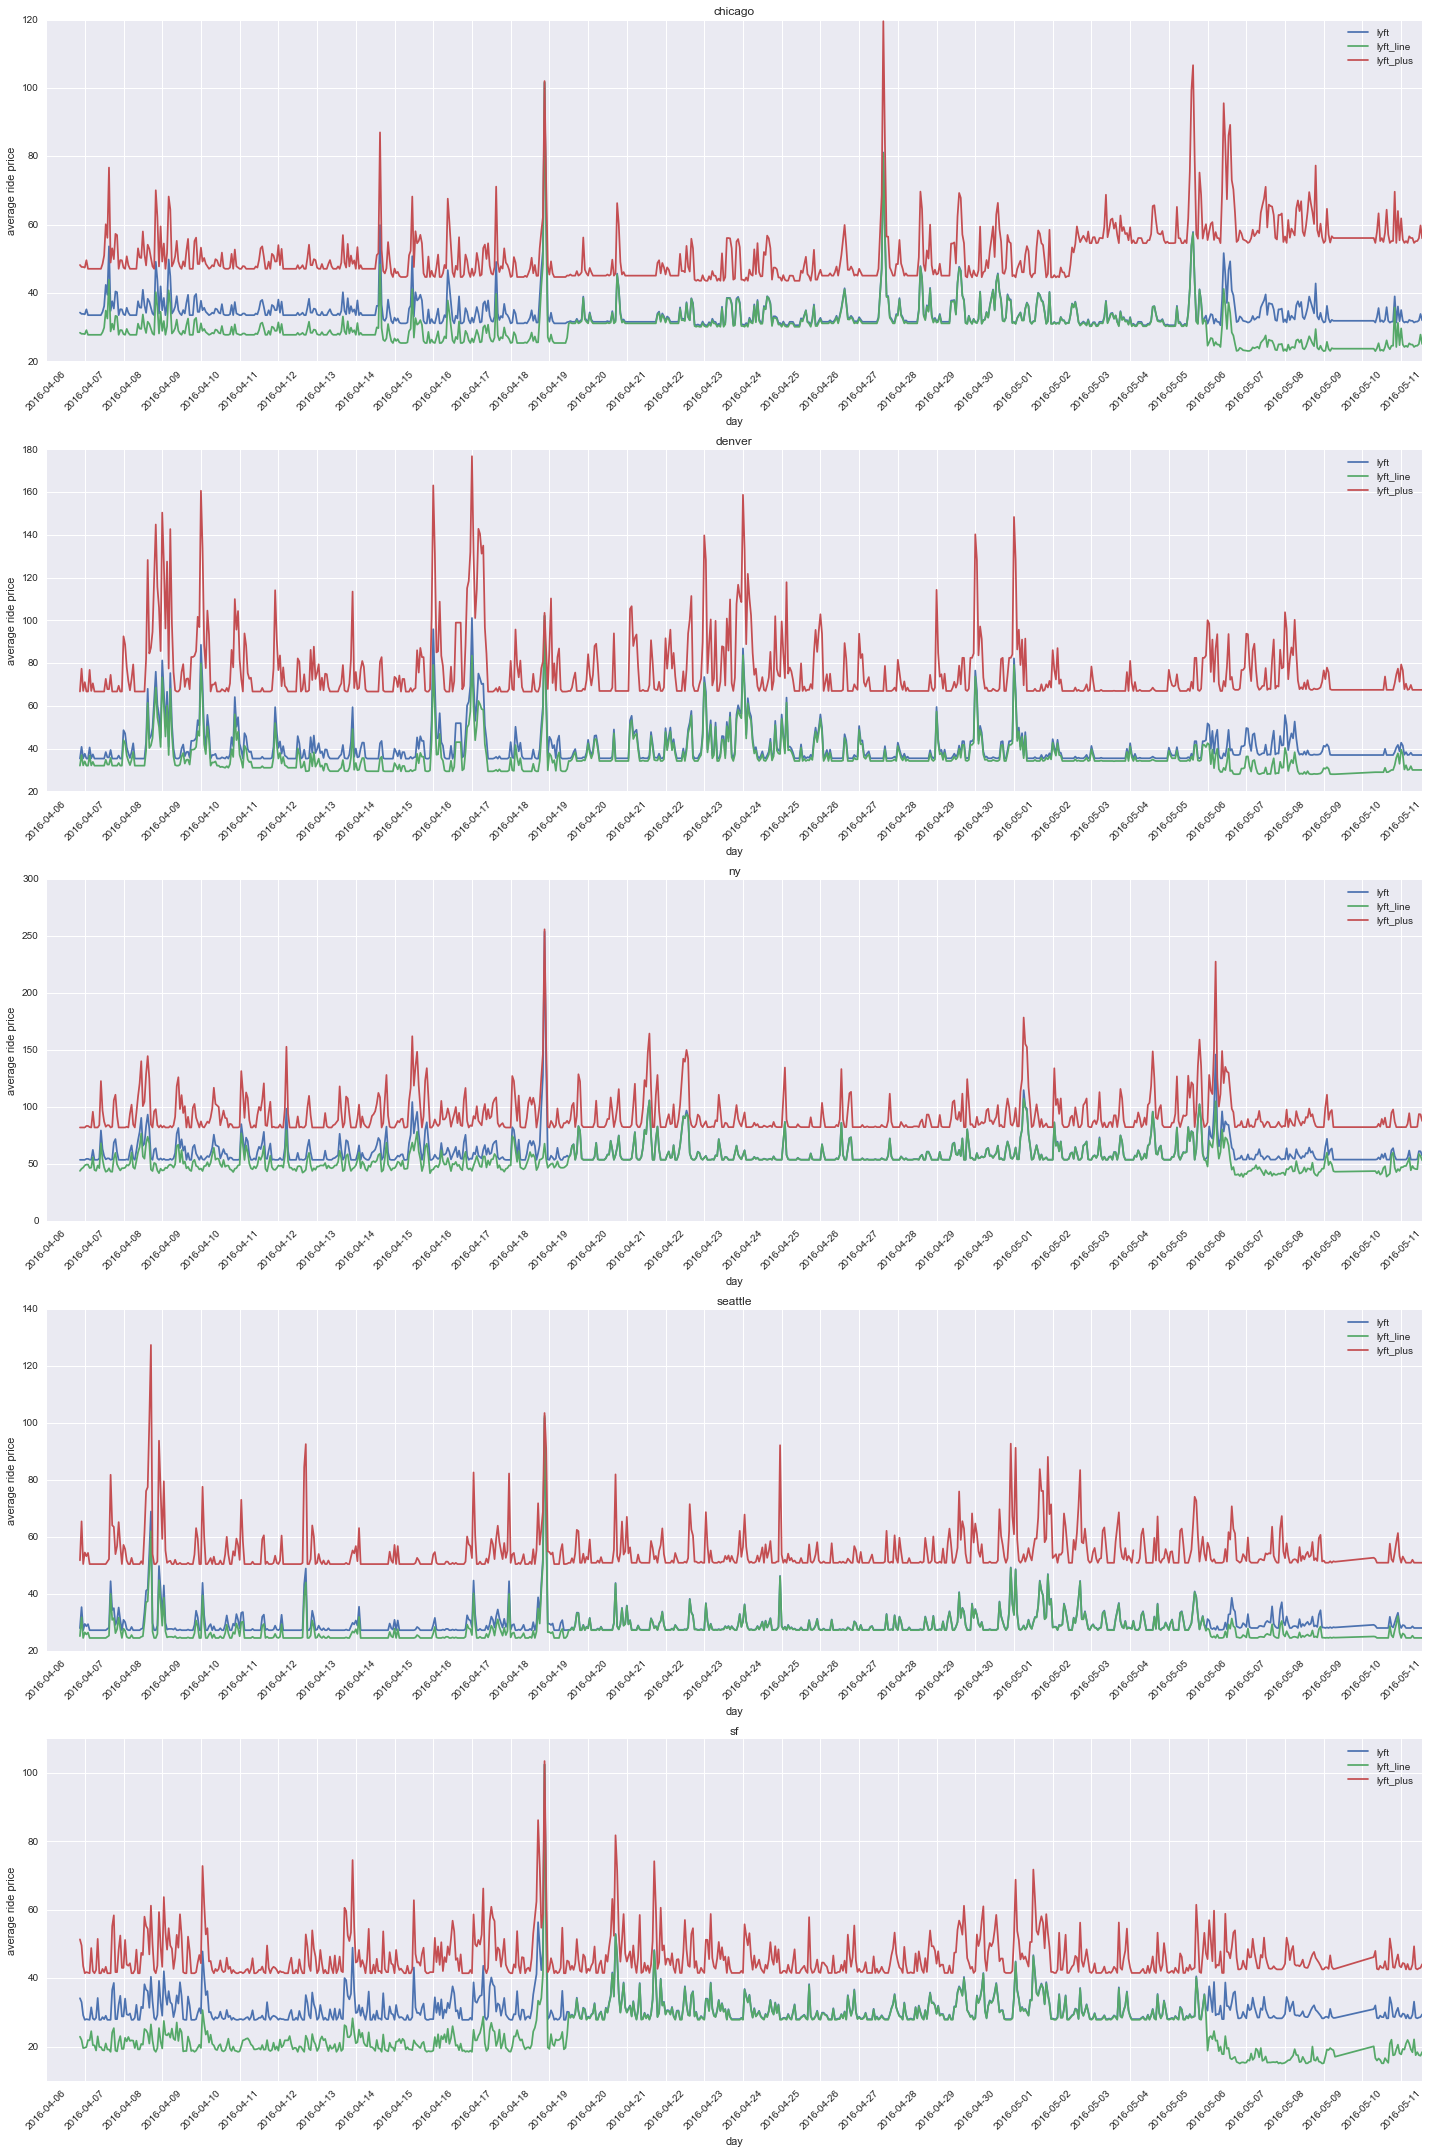

In [14]:
cities = lyft['city'].unique().tolist()
ridetypes = lyft['ride_type'].unique().tolist()
fig, ax = plt.subplots(5,1, figsize=(20,30))
d = lyft.query("ride_type == 'lyft_line' and city == 'denver'")['avg_est_price']
dates = np.unique(d.index.date)
for i, axs in enumerate(ax.reshape(5,)):
    for ridetype in ridetypes:
        data = lyft.query("ride_type == @ridetype and city == @cities[@i]")['avg_est_price']
        axs.plot(data, label=ridetype)
    axs.set_title(cities[i])
    axs.set_ylabel('average ride price')
    axs.set_xlabel('day')
    axs.set_xticks(dates)
    axs.set_xticklabels(dates, rotation='45')
    axs.legend(loc='upper right')
plt.tight_layout()

In [15]:
start_date = str(lyft.index[0])
end_date = str(lyft.index[-1])
ly = lyft.ix[start_date:end_date]
ub = uber.ix[start_date:end_date]

In [16]:
a = np.array([True,False,True,False])
np.insert(a, 1, False)

array([ True, False, False,  True, False], dtype=bool)

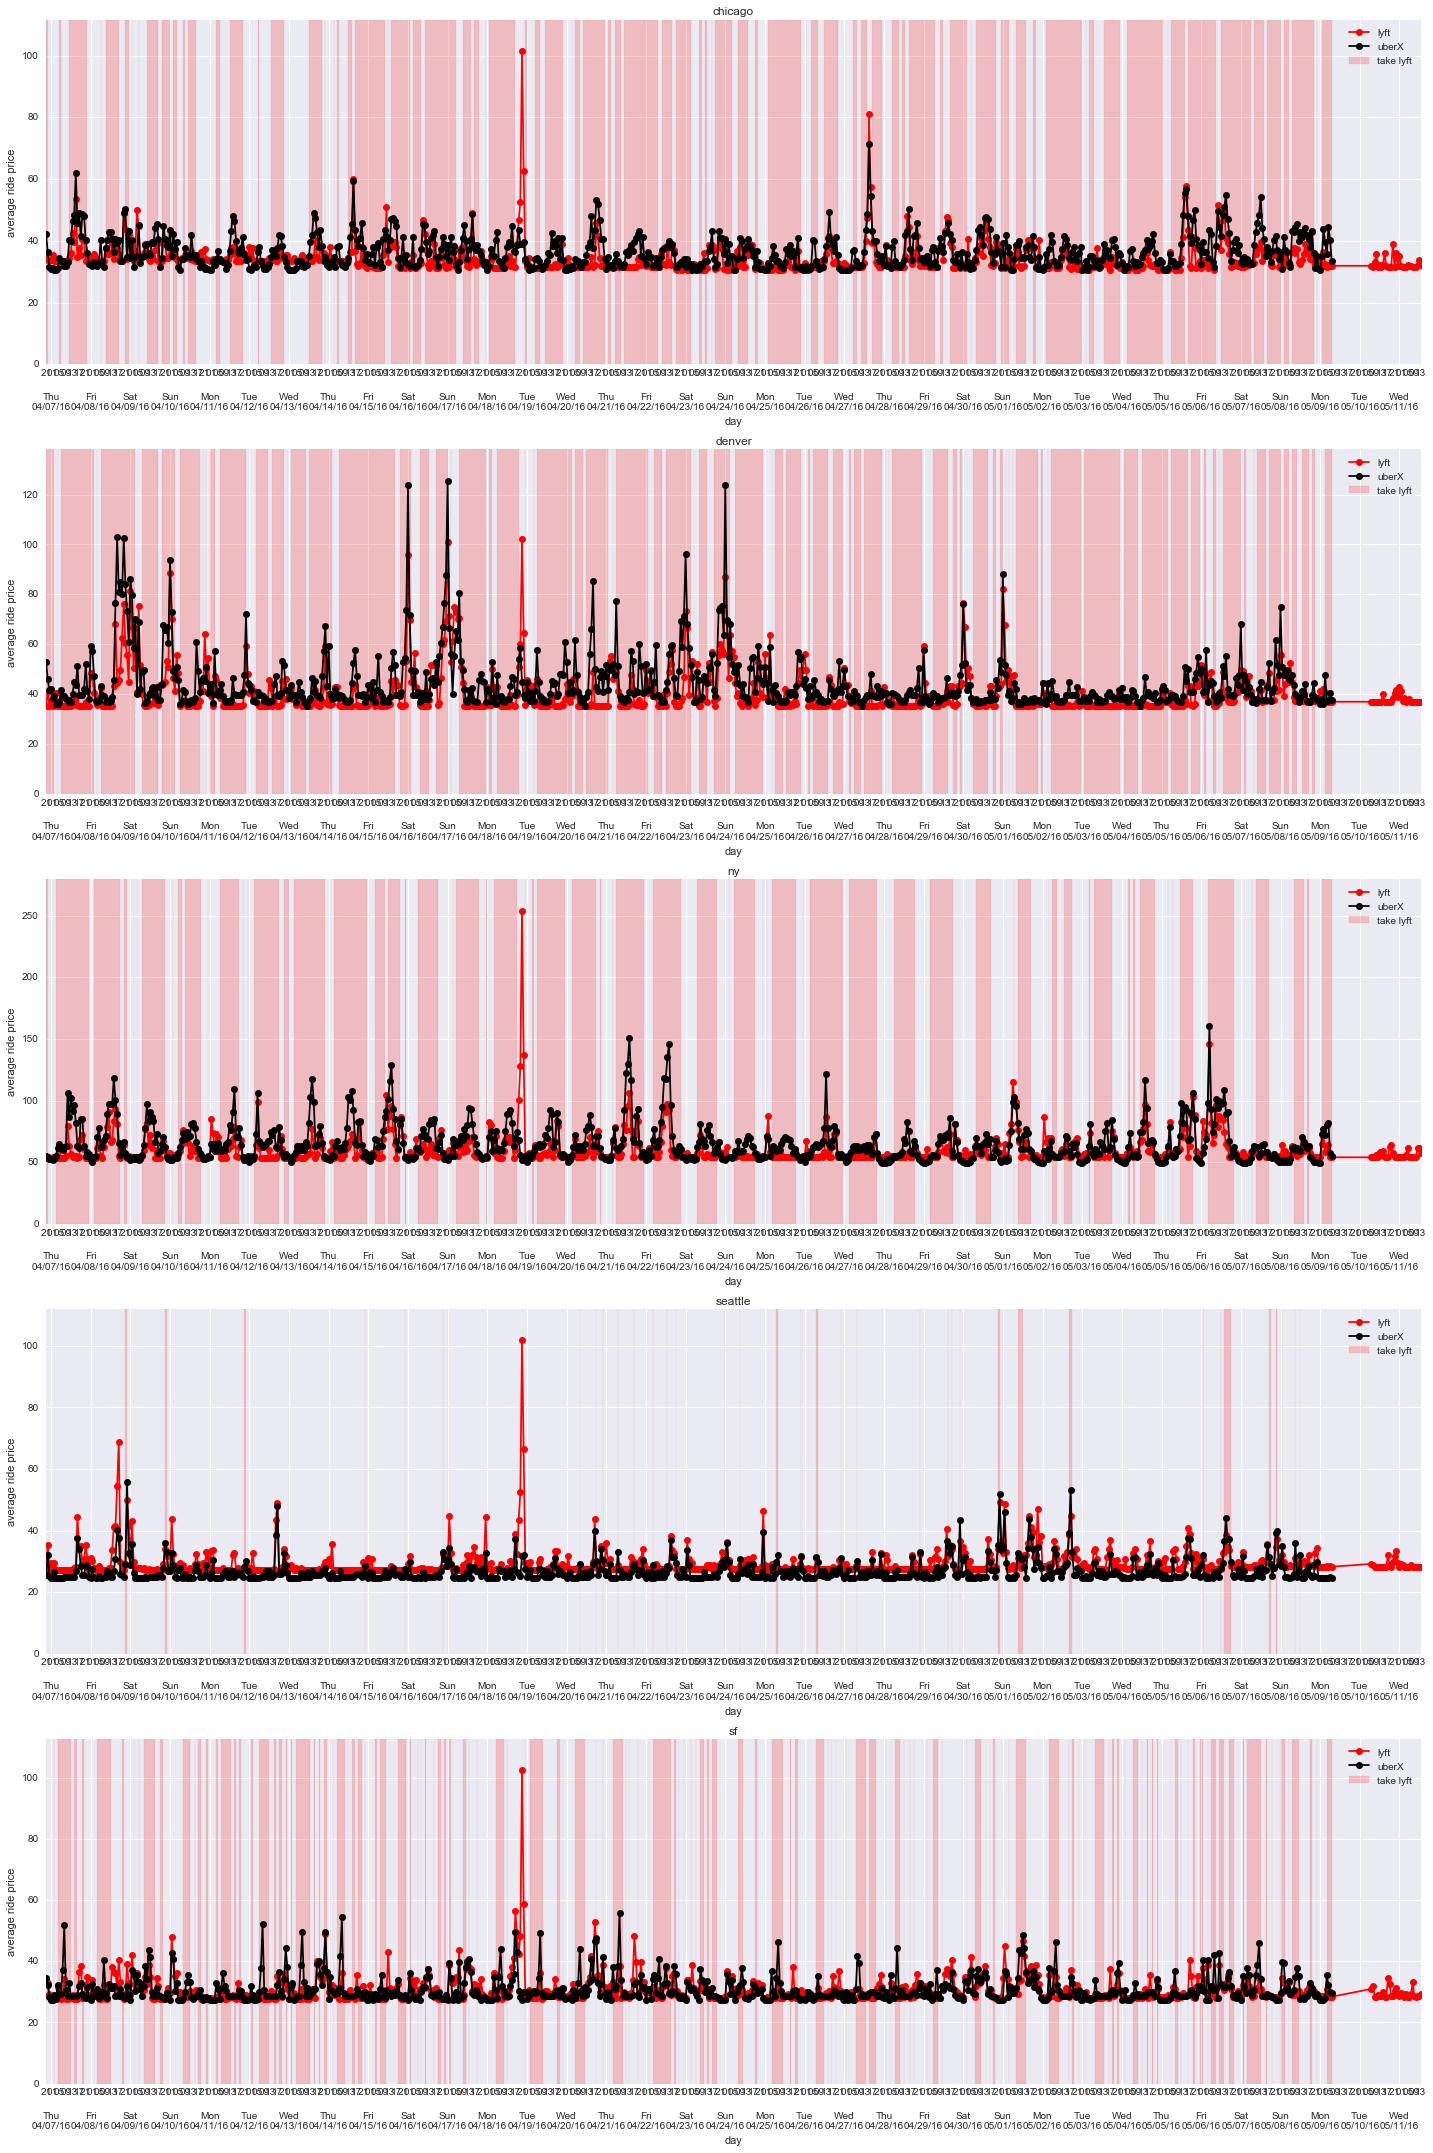

In [17]:
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter, HourLocator

cities = ly['city'].unique().tolist()
fig, ax = plt.subplots(5,1, figsize=(20,30))

ly_d = ly.query("ride_type == 'lyft' and city == 'denver'")['avg_est_price']
ub_d = ub.query("display_name == 'uberX' and city == 'denver'")['avg_price_est']

dates = np.unique(ly_d.index.date)
for i, axs in enumerate(ax.reshape(5,)):
#     axs.set_axis_bgcolor('lightgray')
    ly_data = ly.query("ride_type == 'lyft' and city == @cities[@i]")['avg_est_price']
    axs.plot_date(ly_data.index.to_pydatetime(), ly_data.values, 'o-', label='lyft', color='r')

    ub_data = ub.query("display_name == 'uberX' and city == @cities[@i]")['avg_price_est']
    axs.plot_date(ub_data.index.to_pydatetime(), ub_data.values, 'o-', label='uberX', color='k')
    
    maxy = max([ly_data.max()*1.1,ub_data.max()*1.1])
    diff = ub_data - ly_data
    axs.fill_between(ly_data.index, 0, maxy, where=diff >= 0.0 , alpha=0.2, label='take lyft', color='r')
#     axs.fill_between(ub_data.index, 0, maxs, where=diff < 0.0, alpha=0.2, label='take uber', color='k')
    
    axs.xaxis.set_minor_locator(HourLocator(byhour=range(24), interval=4))
    axs.xaxis.set_minor_formatter(DateFormatter('%H'))
    axs.xaxis.set_major_locator(WeekdayLocator(byweekday=range(7), interval=1))
    axs.xaxis.set_major_formatter(DateFormatter('\n\n%a\n%D'))
    axs.set_title(cities[i])
    axs.set_ylabel('average ride price')
    axs.set_xlabel('day')
    axs.legend(loc='upper right')
#     axs.grid([])
    axs.set_ylim([0,maxy])
    
plt.tight_layout()

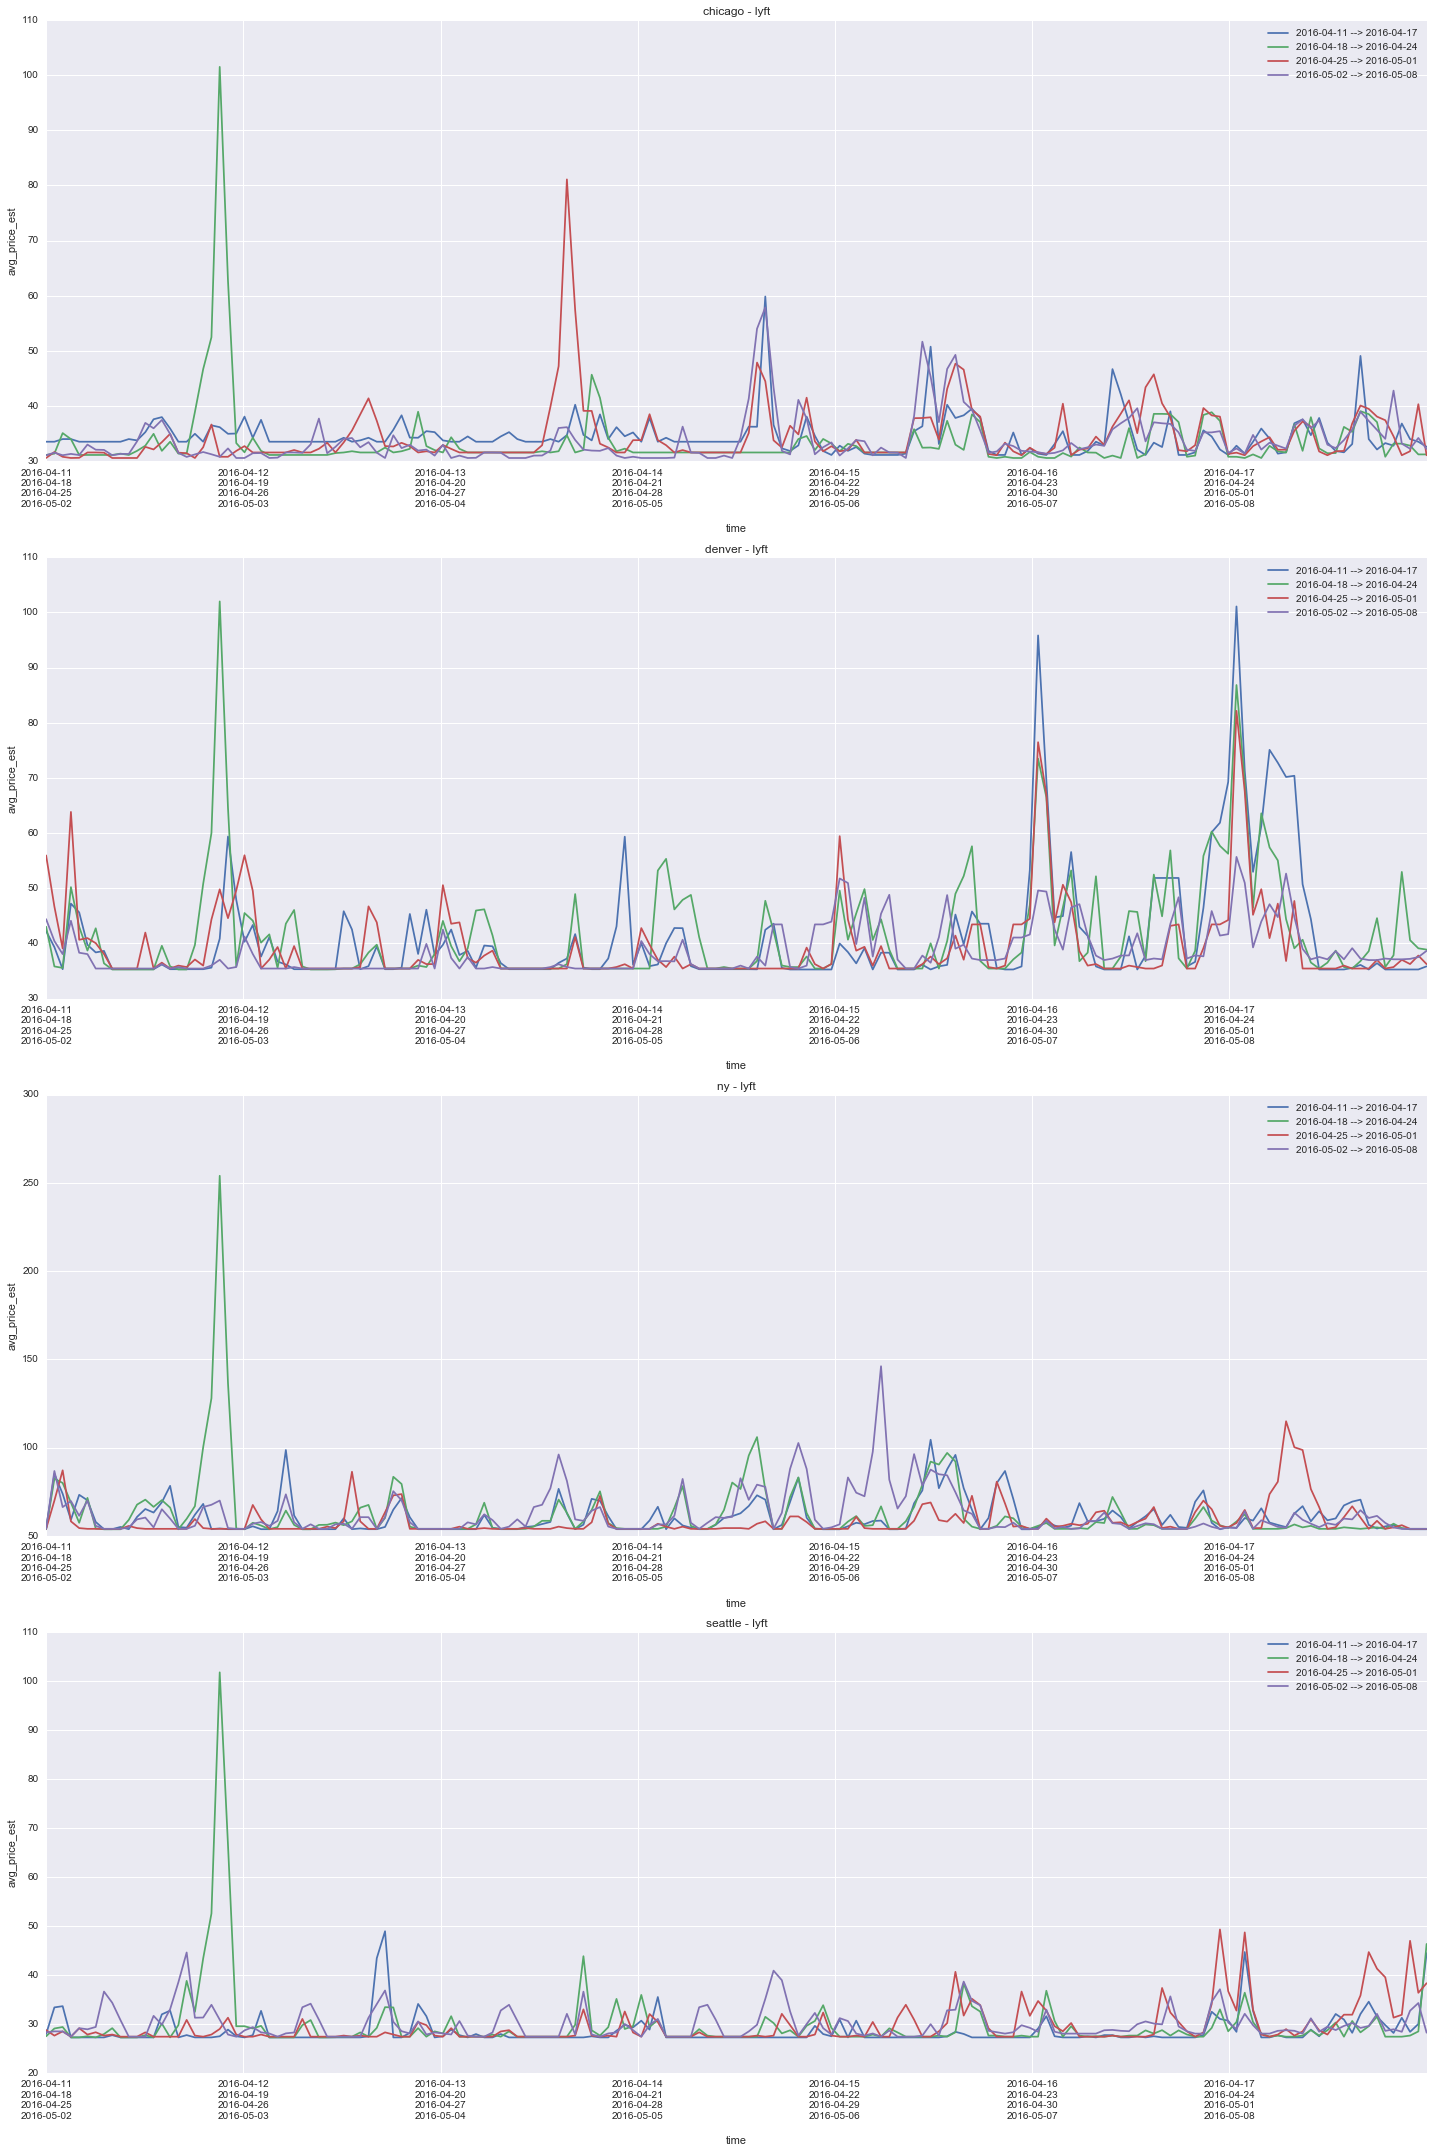

In [35]:
from collections import defaultdict

cities = lyft['city'].unique().tolist()
wkly_dates = [('2016-04-11','2016-04-17'), ('2016-04-18','2016-04-24'), 
              ('2016-04-25','2016-05-01'), ('2016-05-02','2016-05-08')]
agg_wkly_dates = defaultdict(str)
ridetypes = lyft['ride_type'].unique().tolist()
fig, ax = plt.subplots(4,1, figsize=(20,30))
for i, axs in enumerate(ax.reshape(4,)):
    for start, end in wkly_dates:
        data = lyft.query("city == @cities[@i] and ride_type == @ridetypes[0]").ix[start:end]
        axs.plot(data.reset_index()['avg_est_price'], label='{} --> {}'.format(start,end))
        dates = np.unique(data.index.date)
        for j,date in enumerate(dates):
            if str(date) not in agg_wkly_dates[j]:
                agg_wkly_dates[j] += str(date) + '\n'
        axs.set_ylabel('avg_price_est')
        axs.set_xlabel('time')
        start, end = axs.get_xlim()
        stepsize = end / dates.shape[0]
        axs.set_xticks(np.arange(start, end, stepsize))
        axs.set_xticklabels(agg_wkly_dates.values())
        axs.legend(loc='upper right')
        axs.set_title('{} - {}'.format(cities[i], ridetypes[0]))
plt.tight_layout()

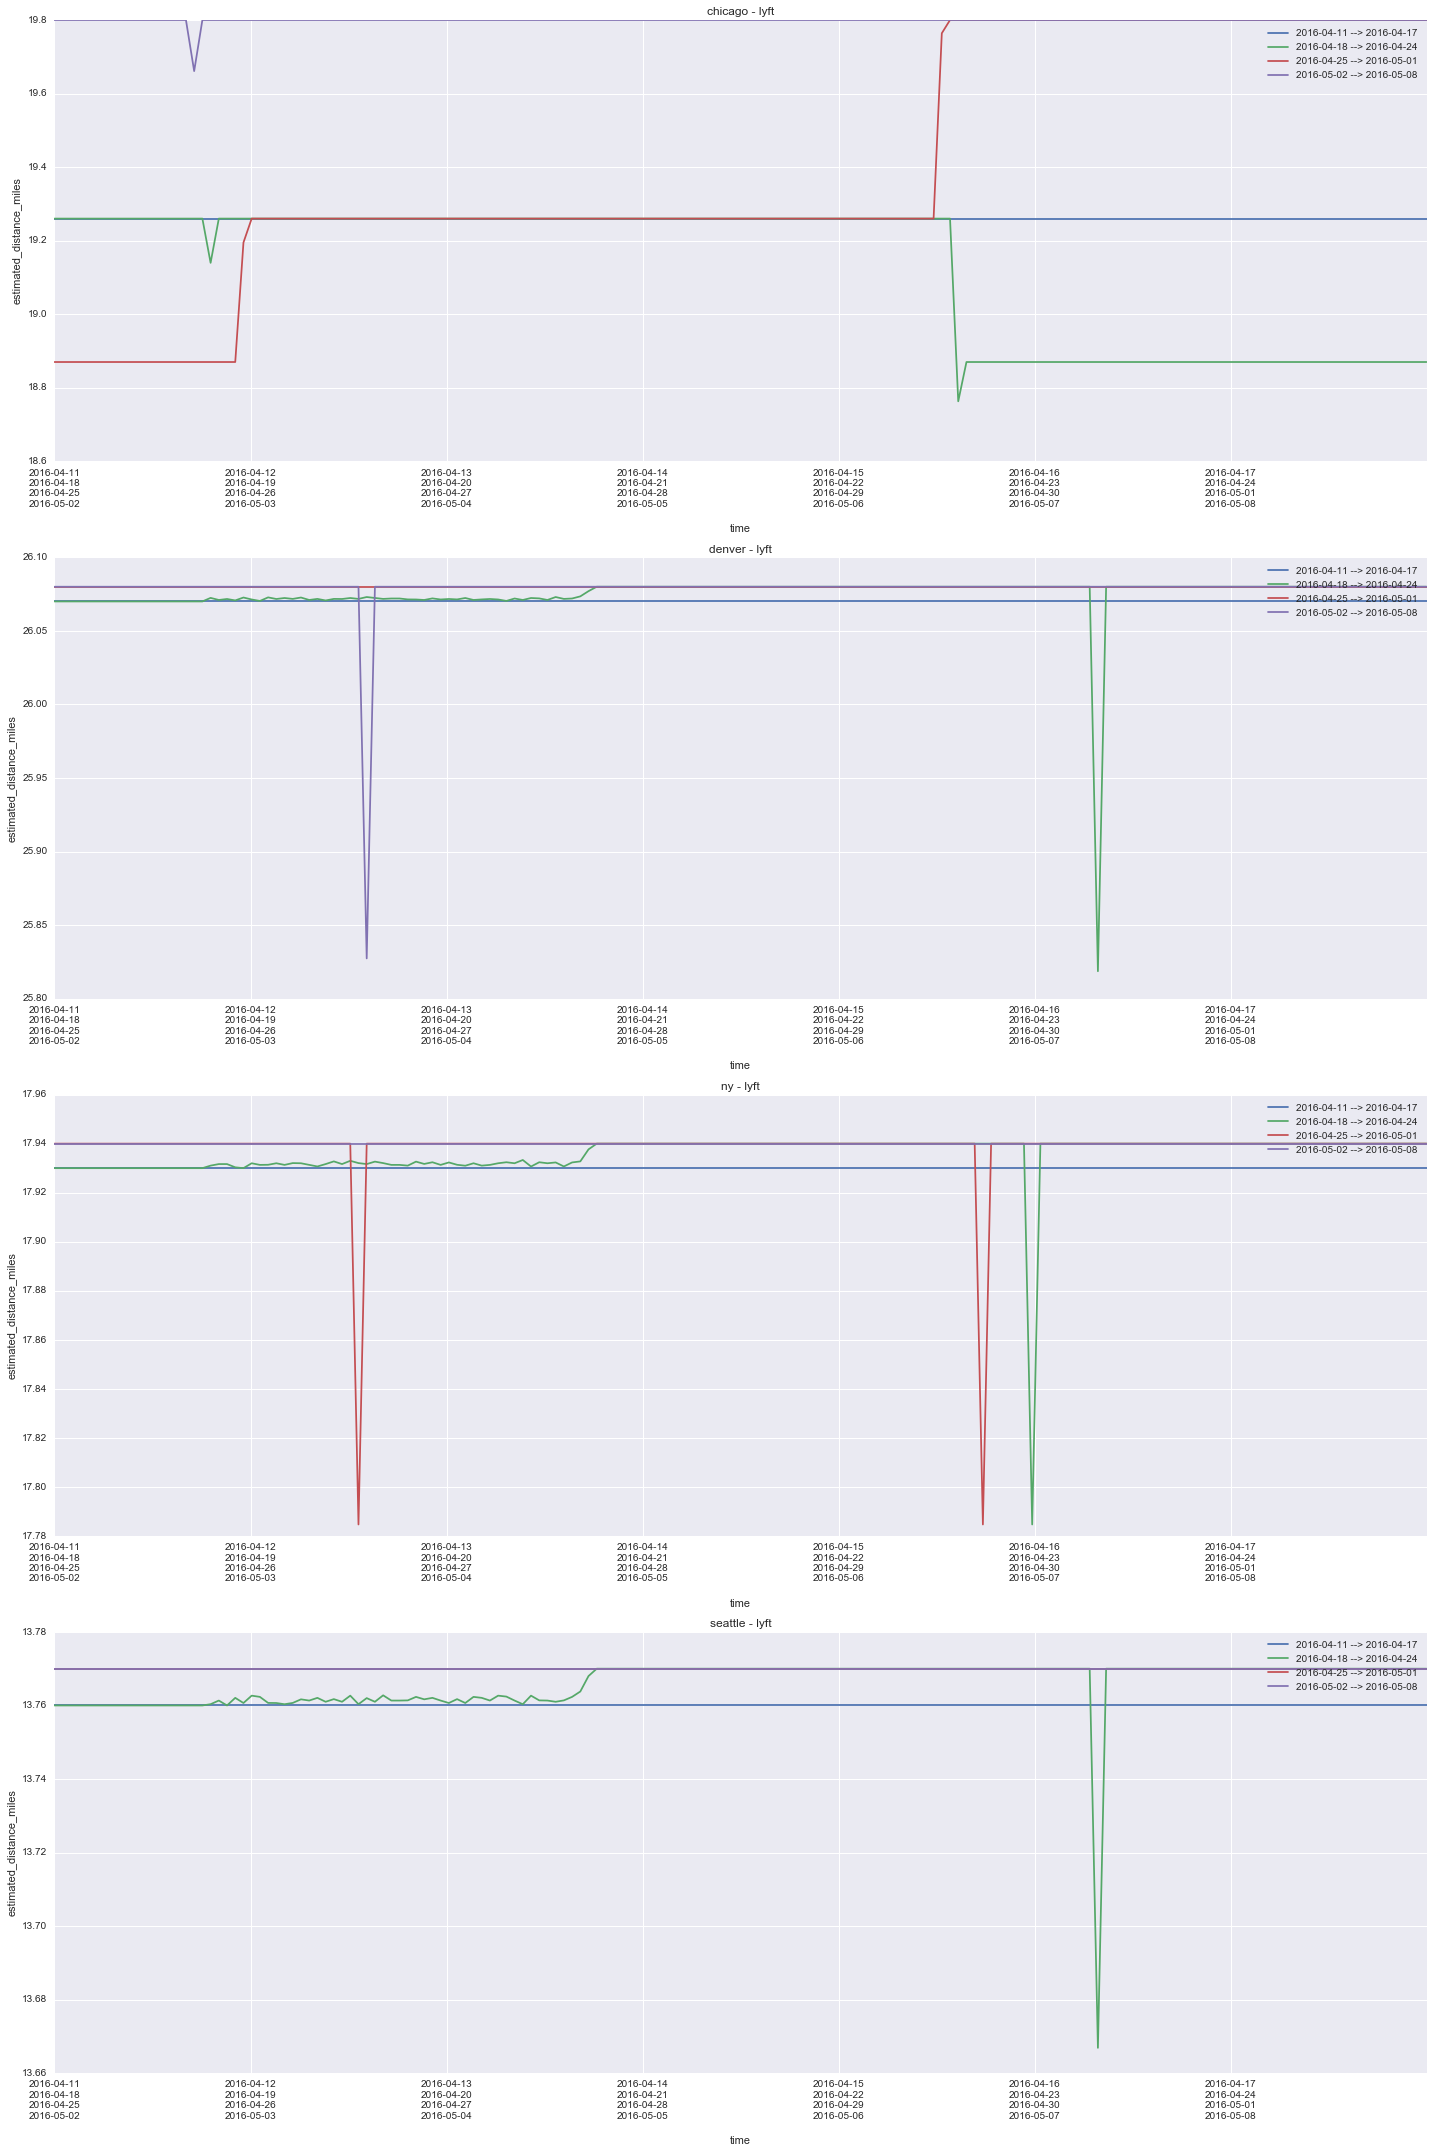

In [40]:
from collections import defaultdict

cities = lyft['city'].unique().tolist()
wkly_dates = [('2016-04-11','2016-04-17'), ('2016-04-18','2016-04-24'), 
              ('2016-04-25','2016-05-01'), ('2016-05-02','2016-05-08')]
agg_wkly_dates = defaultdict(str)
ridetypes = lyft['ride_type'].unique().tolist()
fig, ax = plt.subplots(4,1, figsize=(20,30))
for i, axs in enumerate(ax.reshape(4,)):
    for start, end in wkly_dates:
        data = lyft.query("city == @cities[@i] and ride_type == @ridetypes[0]").ix[start:end]
        axs.plot(data.reset_index()['estimated_distance_miles'], label='{} --> {}'.format(start,end))
        dates = np.unique(data.index.date)
        for j,date in enumerate(dates):
            if str(date) not in agg_wkly_dates[j]:
                agg_wkly_dates[j] += str(date) + '\n'
        axs.set_ylabel('estimated_distance_miles')
        axs.set_xlabel('time')
        start, end = axs.get_xlim()
        stepsize = end / dates.shape[0]
        axs.set_xticks(np.arange(start, end, stepsize))
        axs.set_xticklabels(agg_wkly_dates.values())
        axs.legend(loc='upper right')
        axs.set_title('{} - {}'.format(cities[i], ridetypes[0]))
plt.tight_layout()

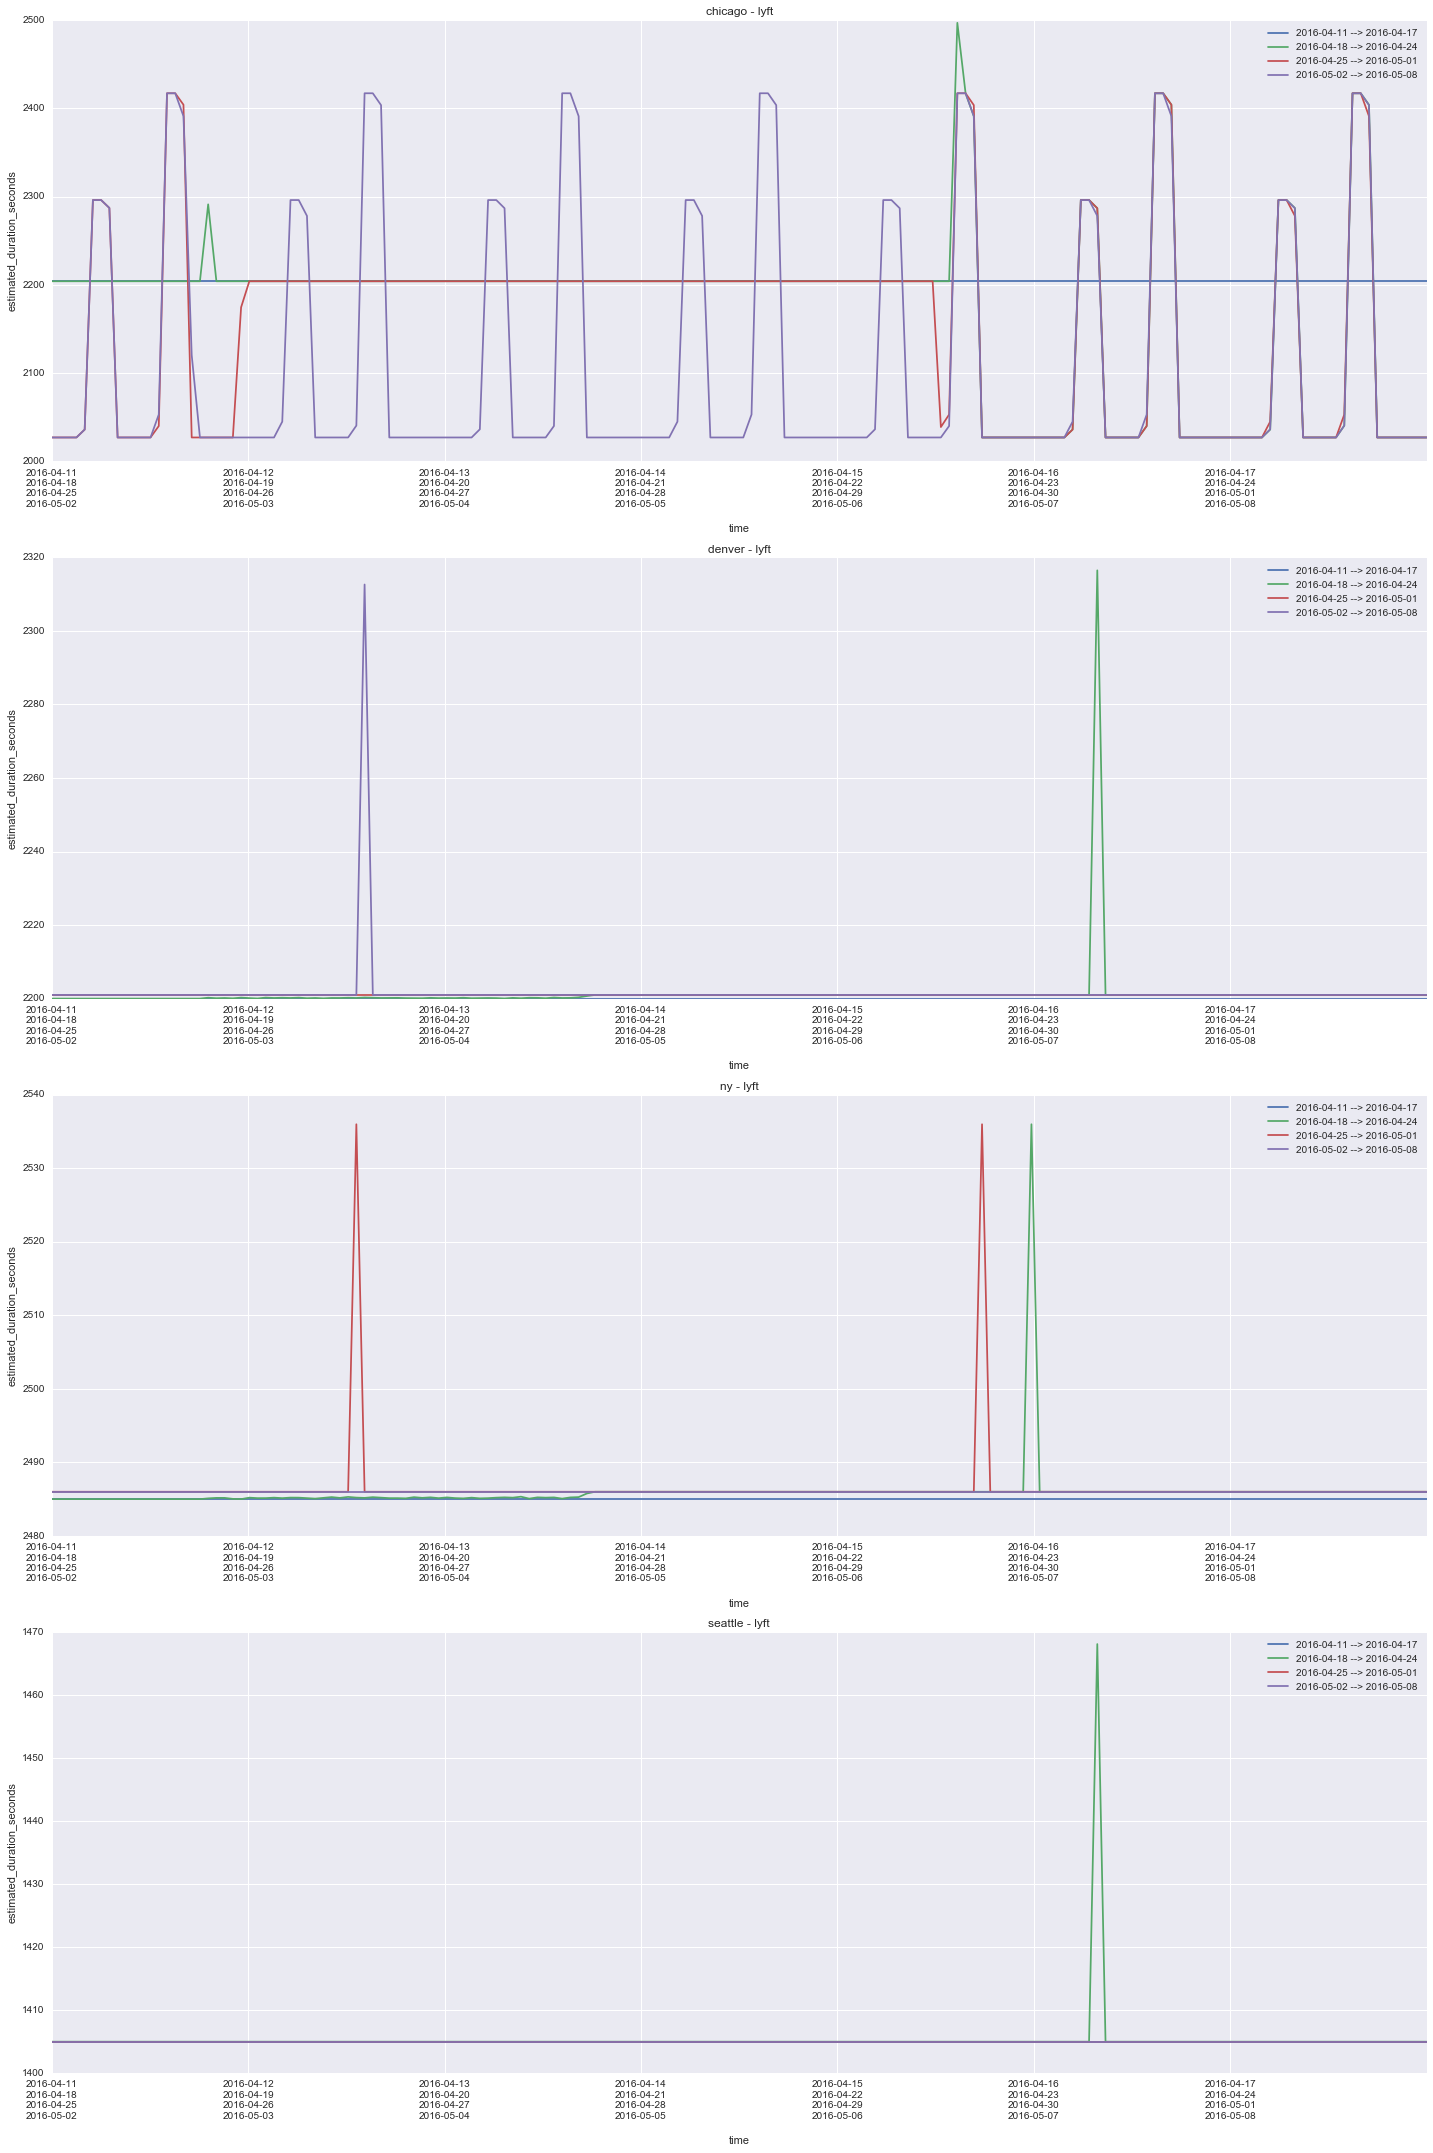

In [39]:
from collections import defaultdict

cities = lyft['city'].unique().tolist()
wkly_dates = [('2016-04-11','2016-04-17'), ('2016-04-18','2016-04-24'), 
              ('2016-04-25','2016-05-01'), ('2016-05-02','2016-05-08')]
agg_wkly_dates = defaultdict(str)
ridetypes = lyft['ride_type'].unique().tolist()
fig, ax = plt.subplots(4,1, figsize=(20,30))
for i, axs in enumerate(ax.reshape(4,)):
    for start, end in wkly_dates:
        data = lyft.query("city == @cities[@i] and ride_type == @ridetypes[0]").ix[start:end]
        axs.plot(data.reset_index()['estimated_duration_seconds'], label='{} --> {}'.format(start,end))
        dates = np.unique(data.index.date)
        for j,date in enumerate(dates):
            if str(date) not in agg_wkly_dates[j]:
                agg_wkly_dates[j] += str(date) + '\n'
        axs.set_ylabel('estimated_duration_seconds')
        axs.set_xlabel('time')
        start, end = axs.get_xlim()
        stepsize = end / dates.shape[0]
        axs.set_xticks(np.arange(start, end, stepsize))
        axs.set_xticklabels(agg_wkly_dates.values())
        axs.legend(loc='upper right')
        axs.set_title('{} - {}'.format(cities[i], ridetypes[0]))
plt.tight_layout()

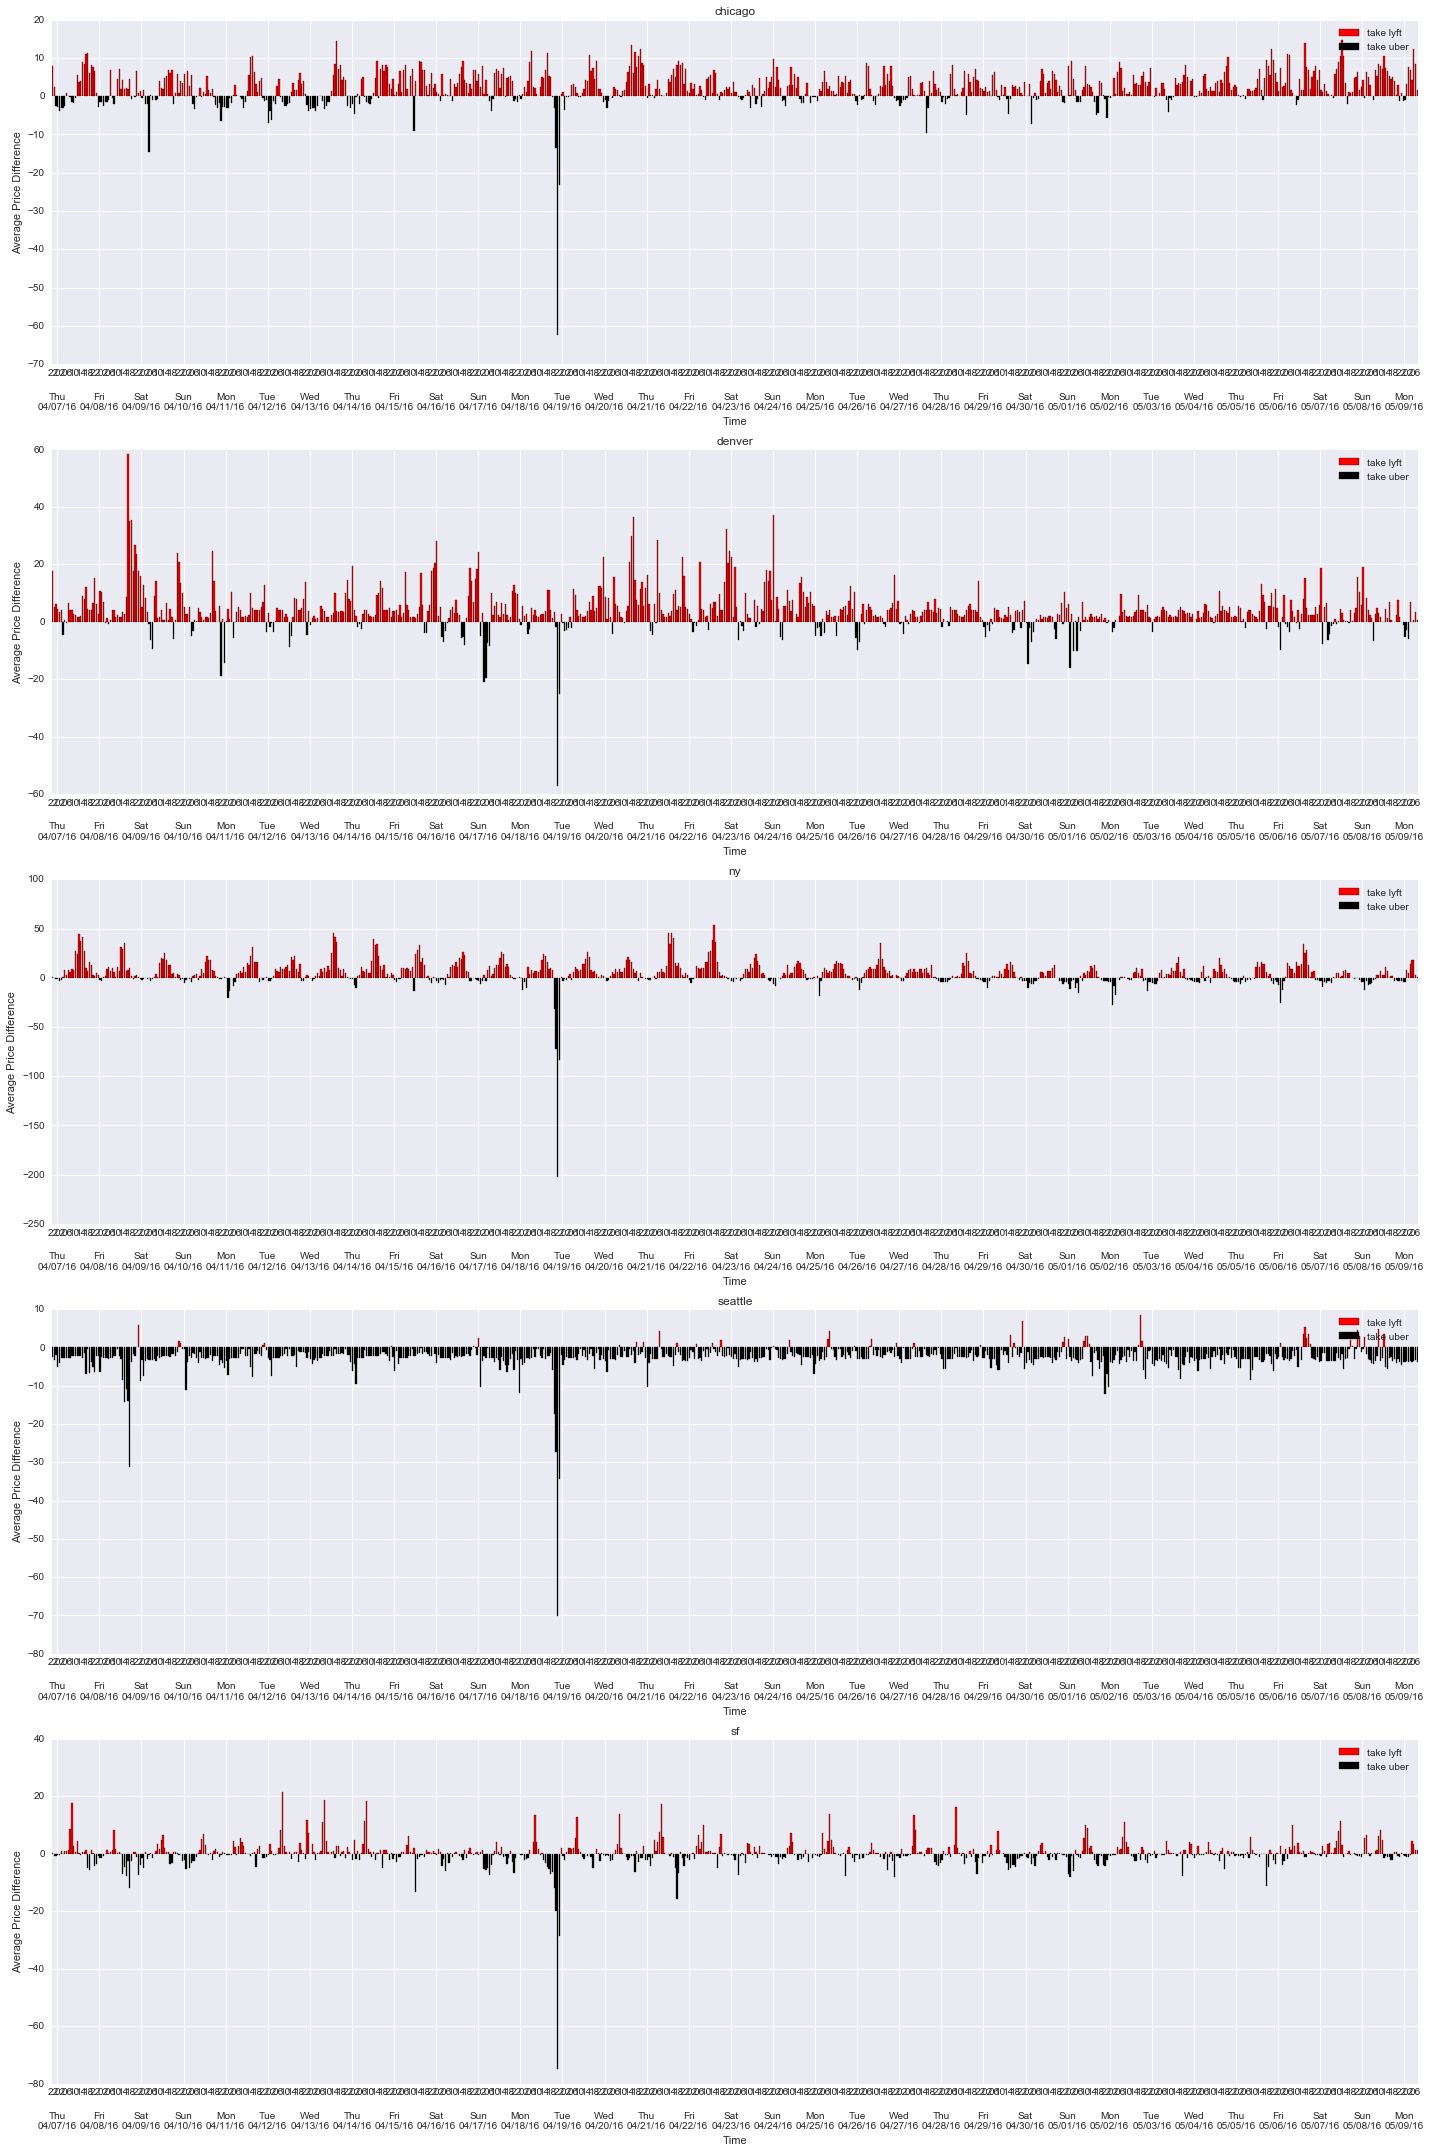

In [36]:
### make a histogram of price differences
cities = ly['city'].unique().tolist()
fig, ax = plt.subplots(5,1, figsize=(20,30))

for i, axs in enumerate(ax.reshape(5,)):
    ly_data = ly.query("ride_type == 'lyft' and city == @cities[@i]")['avg_est_price']
    ub_data = ub.query("display_name == 'uberX' and city == @cities[@i]")['avg_price_est']
    diff = ub_data - ly_data
    pos = diff > 0.0
    neg = diff < 0.0
    axs.bar(diff[pos].index.to_pydatetime(), diff[pos].values, width=0.03, color='r', label="take lyft")
    axs.bar(diff[neg].index.to_pydatetime(), diff[neg].values, width=0.03, color='k', label="take uber")
    axs.xaxis.set_minor_locator(HourLocator(byhour=range(24), interval=4))
    axs.xaxis.set_minor_formatter(DateFormatter('%H'))
    axs.xaxis.set_major_locator(WeekdayLocator(byweekday=range(7), interval=1))
    axs.xaxis.set_major_formatter(DateFormatter('\n\n%a\n%D'))
    axs.set_title(cities[i])
    axs.set_ylabel('Average Price Difference')
    axs.set_xlabel('Time')
    axs.legend(loc='upper right')
plt.tight_layout()

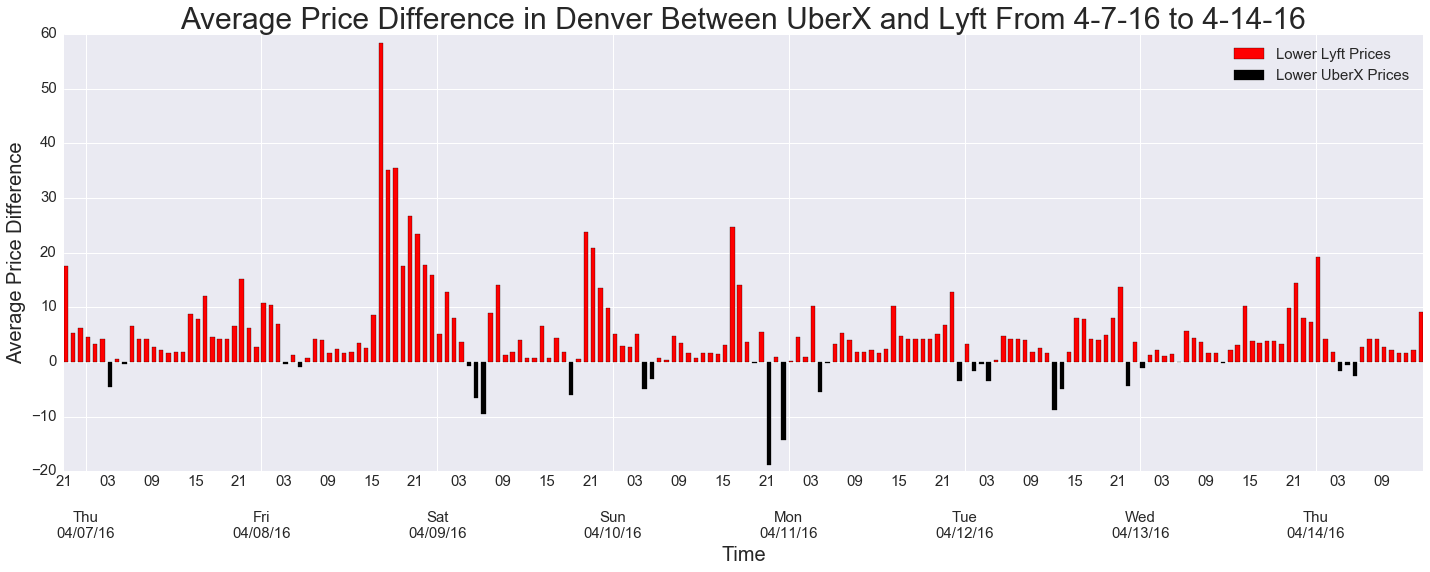

In [16]:
cities = ly['city'].unique().tolist()
fig, axs = plt.subplots(figsize=(20,8))

ly_data = ly.query("ride_type == 'lyft' and city == @cities[1]")['avg_est_price']
ub_data = ub.query("display_name == 'uberX' and city == @cities[1]")['avg_price_est']
diff = ub_data - ly_data
pos = diff > 0.0
neg = diff < 0.0
axs.bar(diff[pos].index.to_pydatetime(), diff[pos].values, width=0.025, color='r', label="Lower Lyft Prices")
axs.bar(diff[neg].index.to_pydatetime(), diff[neg].values, width=0.025, color='k', label="Lower UberX Prices")
axs.xaxis.set_minor_locator(HourLocator(byhour=range(24), interval=6))
axs.xaxis.set_minor_formatter(DateFormatter('%H'))
axs.xaxis.set_major_locator(WeekdayLocator(byweekday=range(7), interval=1))
axs.xaxis.set_major_formatter(DateFormatter('\n\n%a\n%D'))
axs.set_title("Average Price Difference in Denver Between UberX and Lyft From 4-7-16 to 4-14-16", fontsize=30)
axs.set_ylabel('Average Price Difference', fontsize=20)
axs.set_xlabel('Time', fontsize=20)
axs.tick_params(labelsize=15, which="both")
axs.legend(loc='upper right', fontsize=15);
plt.tight_layout()

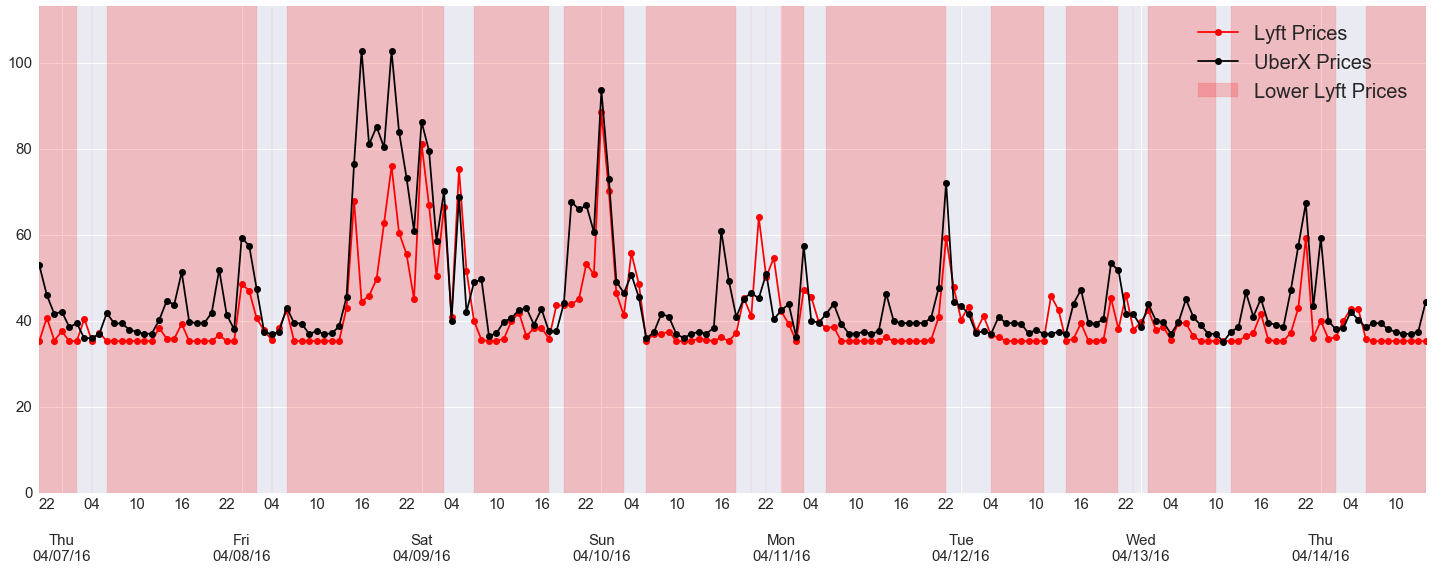

In [31]:
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter, HourLocator

cities = ly['city'].unique().tolist()
fig, axs = plt.subplots(figsize=(20,8))

ly_d = ly.query("ride_type == 'lyft' and city == 'denver'")['avg_est_price']
ub_d = ub.query("display_name == 'uberX' and city == 'denver'")['avg_price_est']

dates = np.unique(ly_d.index.date)
ly_data = ly.query("ride_type == 'lyft' and city == @cities[1]")['avg_est_price']
axs.plot_date(ly_data.index.to_pydatetime(), ly_data.values, 'o-', label='Lyft Prices', color='r')

ub_data = ub.query("display_name == 'uberX' and city == @cities[1]")['avg_price_est']
axs.plot_date(ub_data.index.to_pydatetime(), ub_data.values, 'o-', label='UberX Prices', color='k')

maxy = max([ly_data.max()*1.1,ub_data.max()*1.1])
diff = ub_data - ly_data
axs.fill_between(ly_data.index, 0, maxy, where=diff >= 0.0 , alpha=0.2, label='Lower Lyft Prices', color='r')

axs.xaxis.set_minor_locator(HourLocator(byhour=range(24), interval=6))
axs.xaxis.set_minor_formatter(DateFormatter('%H'))
axs.xaxis.set_major_locator(WeekdayLocator(byweekday=range(7), interval=1))
axs.xaxis.set_major_formatter(DateFormatter('\n\n%a\n%D'))
# axs.set_title("Average Prices in Denver Between UberX and Lyft From 4-7-16 to 4-14-16", fontsize=30)
# axs.set_ylabel('Average Price Estimate', fontsize=20)
# axs.set_xlabel('Time', fontsize=20)
axs.tick_params(labelsize=15, which="both")
axs.legend(loc='upper right', fontsize=20);
axs.set_ylim([0,maxy])
    
plt.tight_layout()

In [18]:
forecast = pd.read_csv("../rideshare_app/data/live_forecast_data.csv", parse_dates=['record_time'])
model1 = pd.read_csv("../rideshare_app/data/model1_w_surgemulti_forecast.csv", parse_dates=['record_time'])
model3 = pd.read_csv("../rideshare_app/data/ridgecv_uber_forecast.csv", parse_dates=['record_time'])
model4 = pd.read_csv("../rideshare_app/data/arima_forecast.csv", parse_dates=['record_time'])
model5 = pd.read_csv("../rideshare_app/data/xgboost_model_forecast.csv", parse_dates=['record_time'])

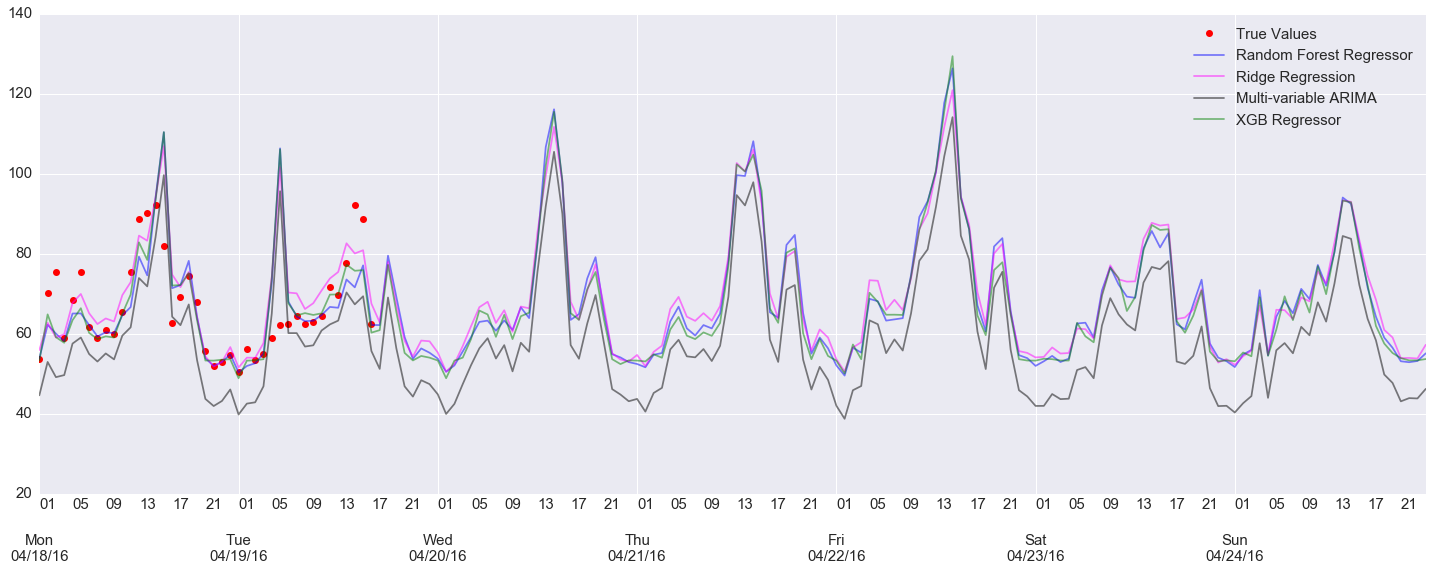

In [19]:
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter, HourLocator

fig, axs = plt.subplots(figsize=(20,8))
f = forecast.set_index("record_time").query("city == 'ny' and display_name == 'uberx'")['avg_price_est']
m1 = model1.set_index("record_time").query("city_ny == 1 and display_name_uberX == 1")['y_forecast']
m3 = model3.set_index("record_time").query("city_ny == 1 and display_name_uberX == 1")['y_forecast']
m4 = model4.set_index("record_time").query("city_ny == 1 and display_name_uberX == 1")['y_forecast']
m5 = model5.set_index("record_time").query("city_ny == 1 and display_name_uberX == 1")['y_forecast']

axs.plot_date(f.index.to_pydatetime(), f.values, 'o', label="True Values", color='r');
axs.plot_date(m1.index.to_pydatetime(), m1.values, '-', label="Random Forest Regressor", color='b', alpha=0.5);
axs.plot_date(m3.index.to_pydatetime(), m3.values, '-', label="Ridge Regression", color='magenta', alpha=0.5);
axs.plot_date(m4.index.to_pydatetime(), m4.values, '-', label="Multi-variable ARIMA", color='black', alpha=0.5);
axs.plot_date(m5.index.to_pydatetime(), m5.values, '-', label="XGB Regressor", color='g', alpha=0.5);
axs.xaxis.set_minor_locator(HourLocator(byhour=range(24), interval=4))
axs.xaxis.set_minor_formatter(DateFormatter('%H'))
axs.xaxis.set_major_locator(WeekdayLocator(byweekday=range(7), interval=1))
axs.xaxis.set_major_formatter(DateFormatter('\n\n%a\n%D'))
# axs.set_ylabel('Average Price Estimate', fontsize=20)
# axs.set_xlabel('Time', fontsize=20)
axs.tick_params(labelsize=15, which="both")
axs.legend(loc='upper right', fontsize=15)
# axs.set_title("Forecast of New York UberX Prices From 4/11/16 to 4/17/16", fontsize=30)
plt.tight_layout()

In [20]:
f.head()

record_time
2016-04-18 00:00:00    53.877193
2016-04-18 01:00:00    70.245614
2016-04-18 02:00:00    75.482759
2016-04-18 03:00:00    58.991228
2016-04-18 04:00:00    68.429825
Name: avg_price_est, dtype: float64

In [21]:
df = pd.read_csv("../rideshare_app/data/model1_w_surgemulti_forecast.csv", parse_dates=['record_time'])
short = df.head()

In [22]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [23]:
s = short.style.apply(highlight_max)

In [24]:
s

In [25]:
a = short.style.highlight_max(axis=0)
a

In [26]:
html = a.render()

In [27]:
html

u'\n        <style  type="text/css" >\n        \n        \n            #T_e7a79aa8_0728_11e6_8c47_6003089ed288row0_col1 {\n            \n                background-color:  yellow;\n            \n                background-color:  yellow;\n            \n            }\n        \n            #T_e7a79aa8_0728_11e6_8c47_6003089ed288row0_col2 {\n            \n                background-color:  yellow;\n            \n                background-color:  yellow;\n            \n            }\n        \n            #T_e7a79aa8_0728_11e6_8c47_6003089ed288row0_col4 {\n            \n                background-color:  yellow;\n            \n                background-color:  yellow;\n            \n            }\n        \n            #T_e7a79aa8_0728_11e6_8c47_6003089ed288row0_col5 {\n            \n                background-color:  yellow;\n            \n                background-color:  yellow;\n            \n            }\n        \n            #T_e7a79aa8_0728_11e6_8c47_6003089ed288row0_col6 {\n 

In [28]:
type(a.data)

pandas.core.frame.DataFrame

In [29]:
short.style.highlight_max?

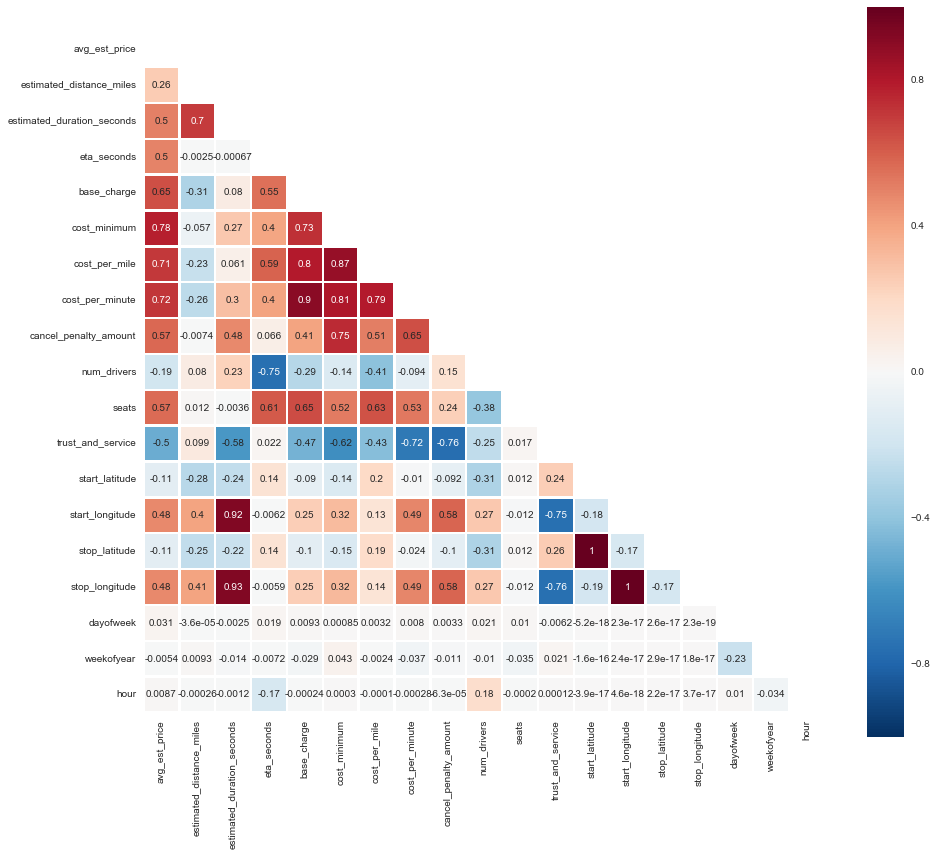

In [8]:
features = ['avg_est_price','estimated_distance_miles',
            'estimated_duration_seconds','eta_seconds','base_charge',
            'cost_minimum','cost_per_mile','cost_per_minute', 'cancel_penalty_amount', 
            'num_drivers', 'seats', 'trust_and_service', 'start_latitude', 'start_longitude', 
            'stop_latitude', 'stop_longitude', 'dayofweek', 'weekofyear','hour']
fs = lyft[features].corr()
mask = np.zeros_like(fs)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(14,12))
with sns.axes_style("white"):
    sns.heatmap(fs, mask=mask, square=True, annot=True, linewidths=1.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.tight_layout();

In [7]:
print lyft.columns.tolist()

['date', 'hour', 'city', 'ride_type', 'avg_est_price', 'estimated_cost_cents_min', 'estimated_cost_cents_max', 'estimated_distance_miles', 'estimated_duration_seconds', 'eta_seconds', 'base_charge', 'cost_minimum', 'cost_per_mile', 'cost_per_minute', 'cancel_penalty_amount', 'num_drivers', 'seats', 'trust_and_service', 'start_latitude', 'start_longitude', 'stop_latitude', 'stop_longitude', 'dayofweek', 'weekofyear']


In [ ]:
# features to use: ['eta_seconds','estimated_distance_miles','estimated_duration_seconds']

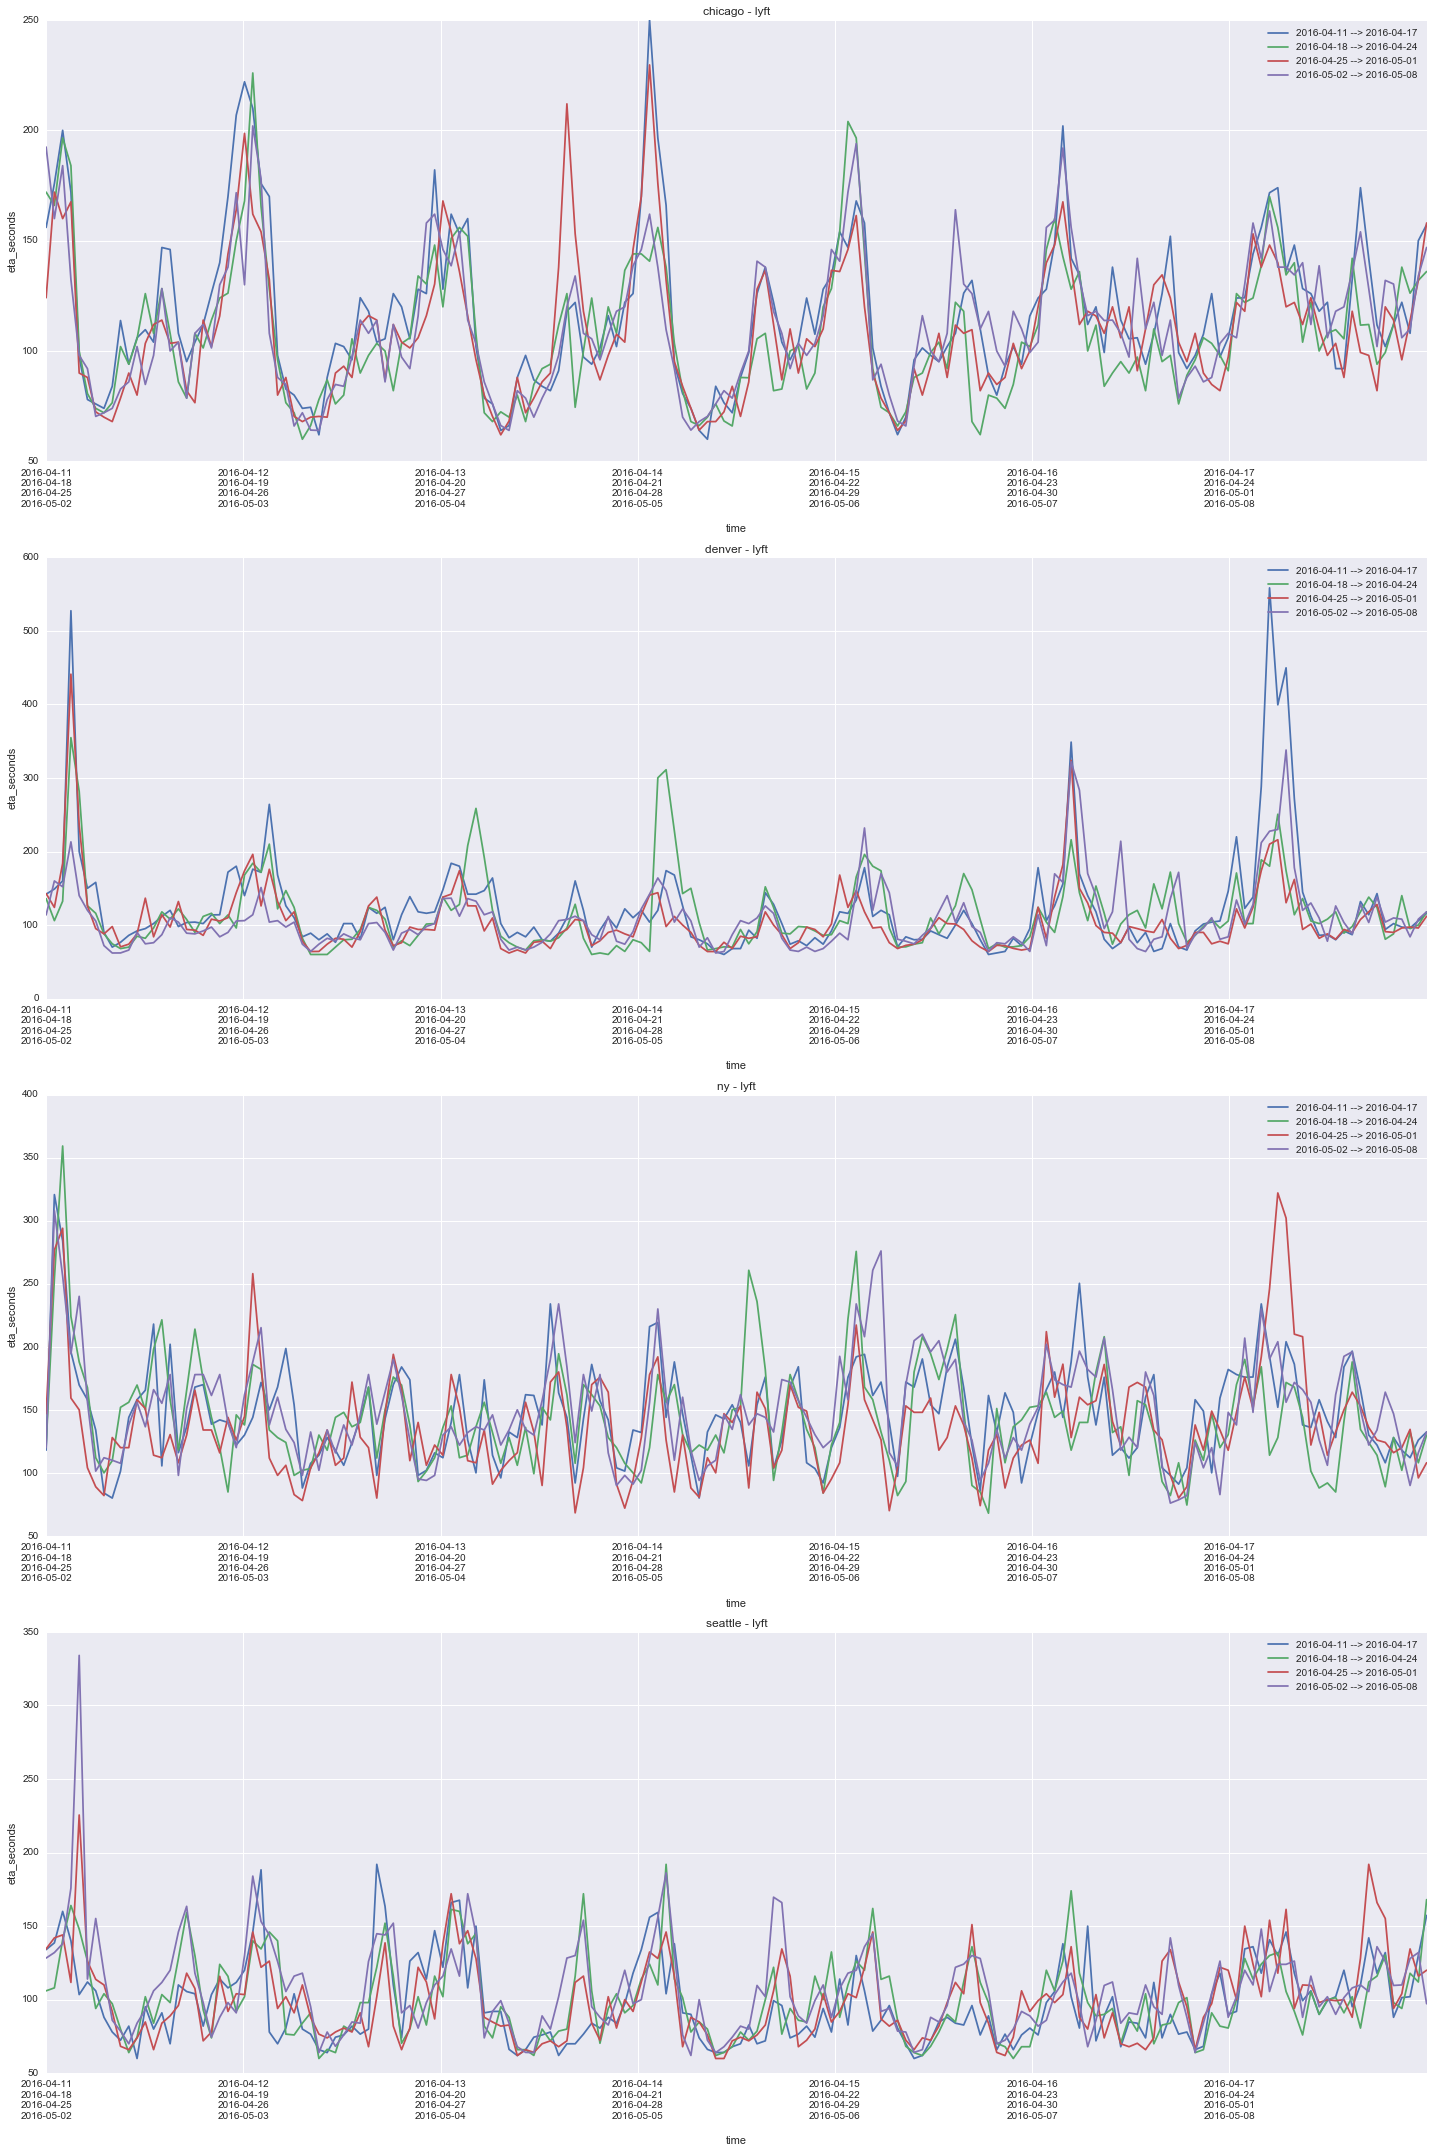

In [9]:
from collections import defaultdict

cities = lyft['city'].unique().tolist()
wkly_dates = [('2016-04-11','2016-04-17'), ('2016-04-18','2016-04-24'), 
              ('2016-04-25','2016-05-01'), ('2016-05-02','2016-05-08')]
agg_wkly_dates = defaultdict(str)
ridetypes = lyft['ride_type'].unique().tolist()
fig, ax = plt.subplots(4,1, figsize=(20,30))
for i, axs in enumerate(ax.reshape(4,)):
    for start, end in wkly_dates:
        data = lyft.query("city == @cities[@i] and ride_type == @ridetypes[0]").ix[start:end]
        axs.plot(data.reset_index()['eta_seconds'], label='{} --> {}'.format(start,end))
        dates = np.unique(data.index.date)
        for j,date in enumerate(dates):
            if str(date) not in agg_wkly_dates[j]:
                agg_wkly_dates[j] += str(date) + '\n'
        axs.set_ylabel('eta_seconds')
        axs.set_xlabel('time')
        start, end = axs.get_xlim()
        stepsize = end / dates.shape[0]
        axs.set_xticks(np.arange(start, end, stepsize))
        axs.set_xticklabels(agg_wkly_dates.values())
        axs.legend(loc='upper right')
        axs.set_title('{} - {}'.format(cities[i], ridetypes[0]))
plt.tight_layout()

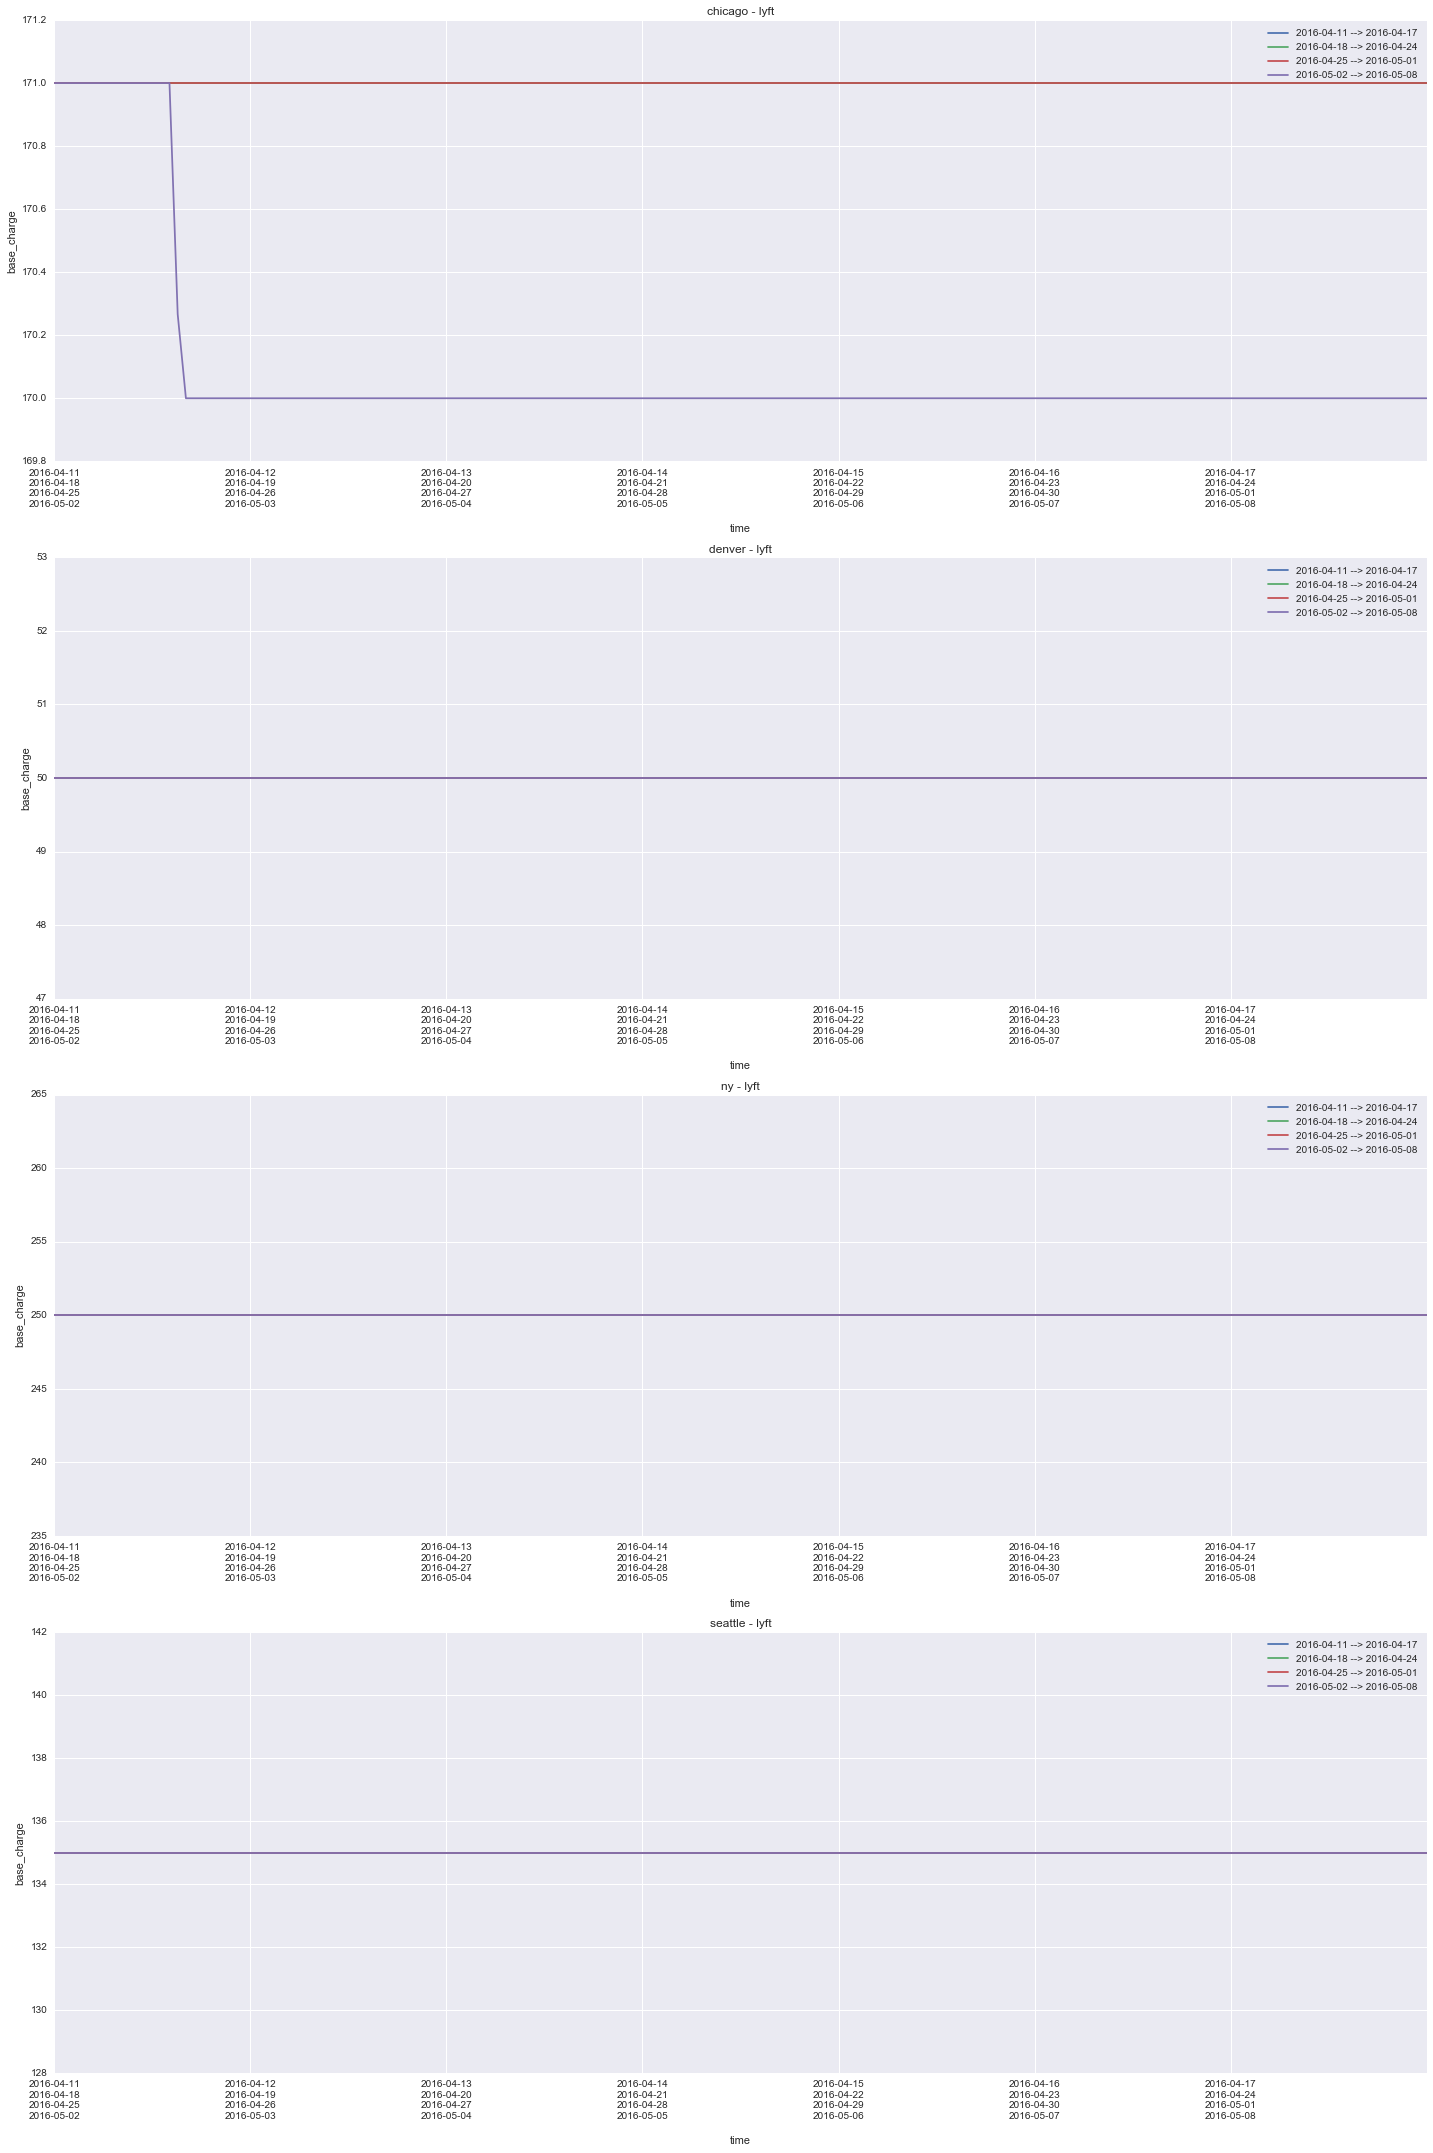

In [10]:
from collections import defaultdict

cities = lyft['city'].unique().tolist()
wkly_dates = [('2016-04-11','2016-04-17'), ('2016-04-18','2016-04-24'), 
              ('2016-04-25','2016-05-01'), ('2016-05-02','2016-05-08')]
agg_wkly_dates = defaultdict(str)
ridetypes = lyft['ride_type'].unique().tolist()
fig, ax = plt.subplots(4,1, figsize=(20,30))
for i, axs in enumerate(ax.reshape(4,)):
    for start, end in wkly_dates:
        data = lyft.query("city == @cities[@i] and ride_type == @ridetypes[0]").ix[start:end]
        axs.plot(data.reset_index()['base_charge'], label='{} --> {}'.format(start,end))
        dates = np.unique(data.index.date)
        for j,date in enumerate(dates):
            if str(date) not in agg_wkly_dates[j]:
                agg_wkly_dates[j] += str(date) + '\n'
        axs.set_ylabel('base_charge')
        axs.set_xlabel('time')
        start, end = axs.get_xlim()
        stepsize = end / dates.shape[0]
        axs.set_xticks(np.arange(start, end, stepsize))
        axs.set_xticklabels(agg_wkly_dates.values())
        axs.legend(loc='upper right')
        axs.set_title('{} - {}'.format(cities[i], ridetypes[0]))
plt.tight_layout()

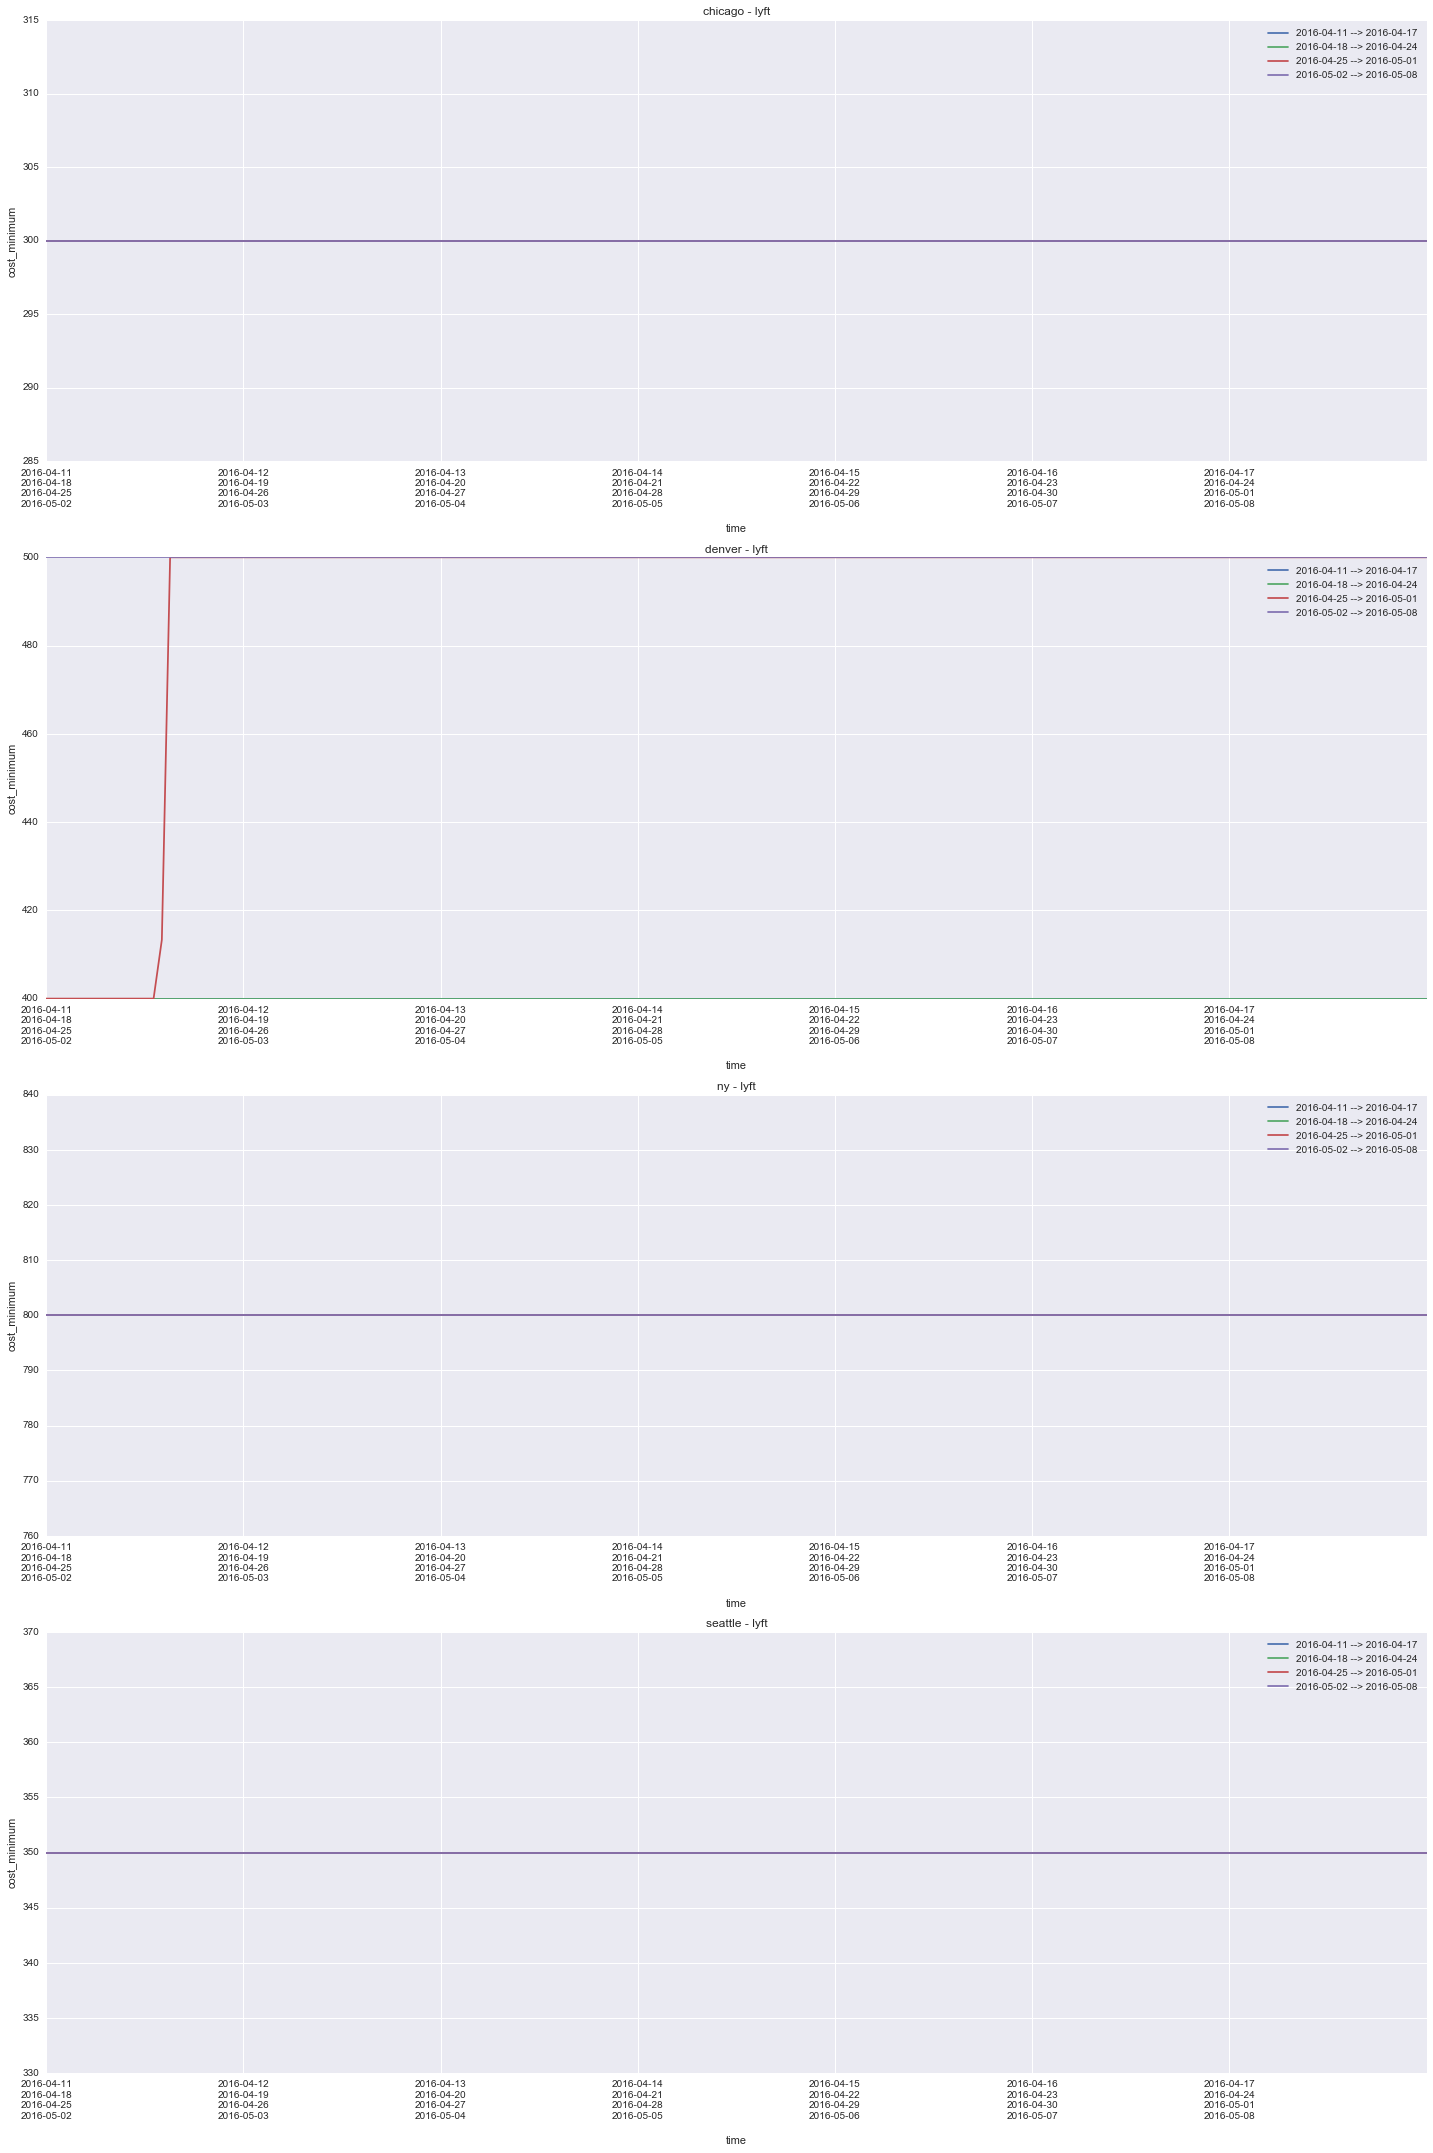

In [11]:
from collections import defaultdict

cities = lyft['city'].unique().tolist()
wkly_dates = [('2016-04-11','2016-04-17'), ('2016-04-18','2016-04-24'), 
              ('2016-04-25','2016-05-01'), ('2016-05-02','2016-05-08')]
agg_wkly_dates = defaultdict(str)
ridetypes = lyft['ride_type'].unique().tolist()
fig, ax = plt.subplots(4,1, figsize=(20,30))
for i, axs in enumerate(ax.reshape(4,)):
    for start, end in wkly_dates:
        data = lyft.query("city == @cities[@i] and ride_type == @ridetypes[0]").ix[start:end]
        axs.plot(data.reset_index()['cost_minimum'], label='{} --> {}'.format(start,end))
        dates = np.unique(data.index.date)
        for j,date in enumerate(dates):
            if str(date) not in agg_wkly_dates[j]:
                agg_wkly_dates[j] += str(date) + '\n'
        axs.set_ylabel('cost_minimum')
        axs.set_xlabel('time')
        start, end = axs.get_xlim()
        stepsize = end / dates.shape[0]
        axs.set_xticks(np.arange(start, end, stepsize))
        axs.set_xticklabels(agg_wkly_dates.values())
        axs.legend(loc='upper right')
        axs.set_title('{} - {}'.format(cities[i], ridetypes[0]))
plt.tight_layout()

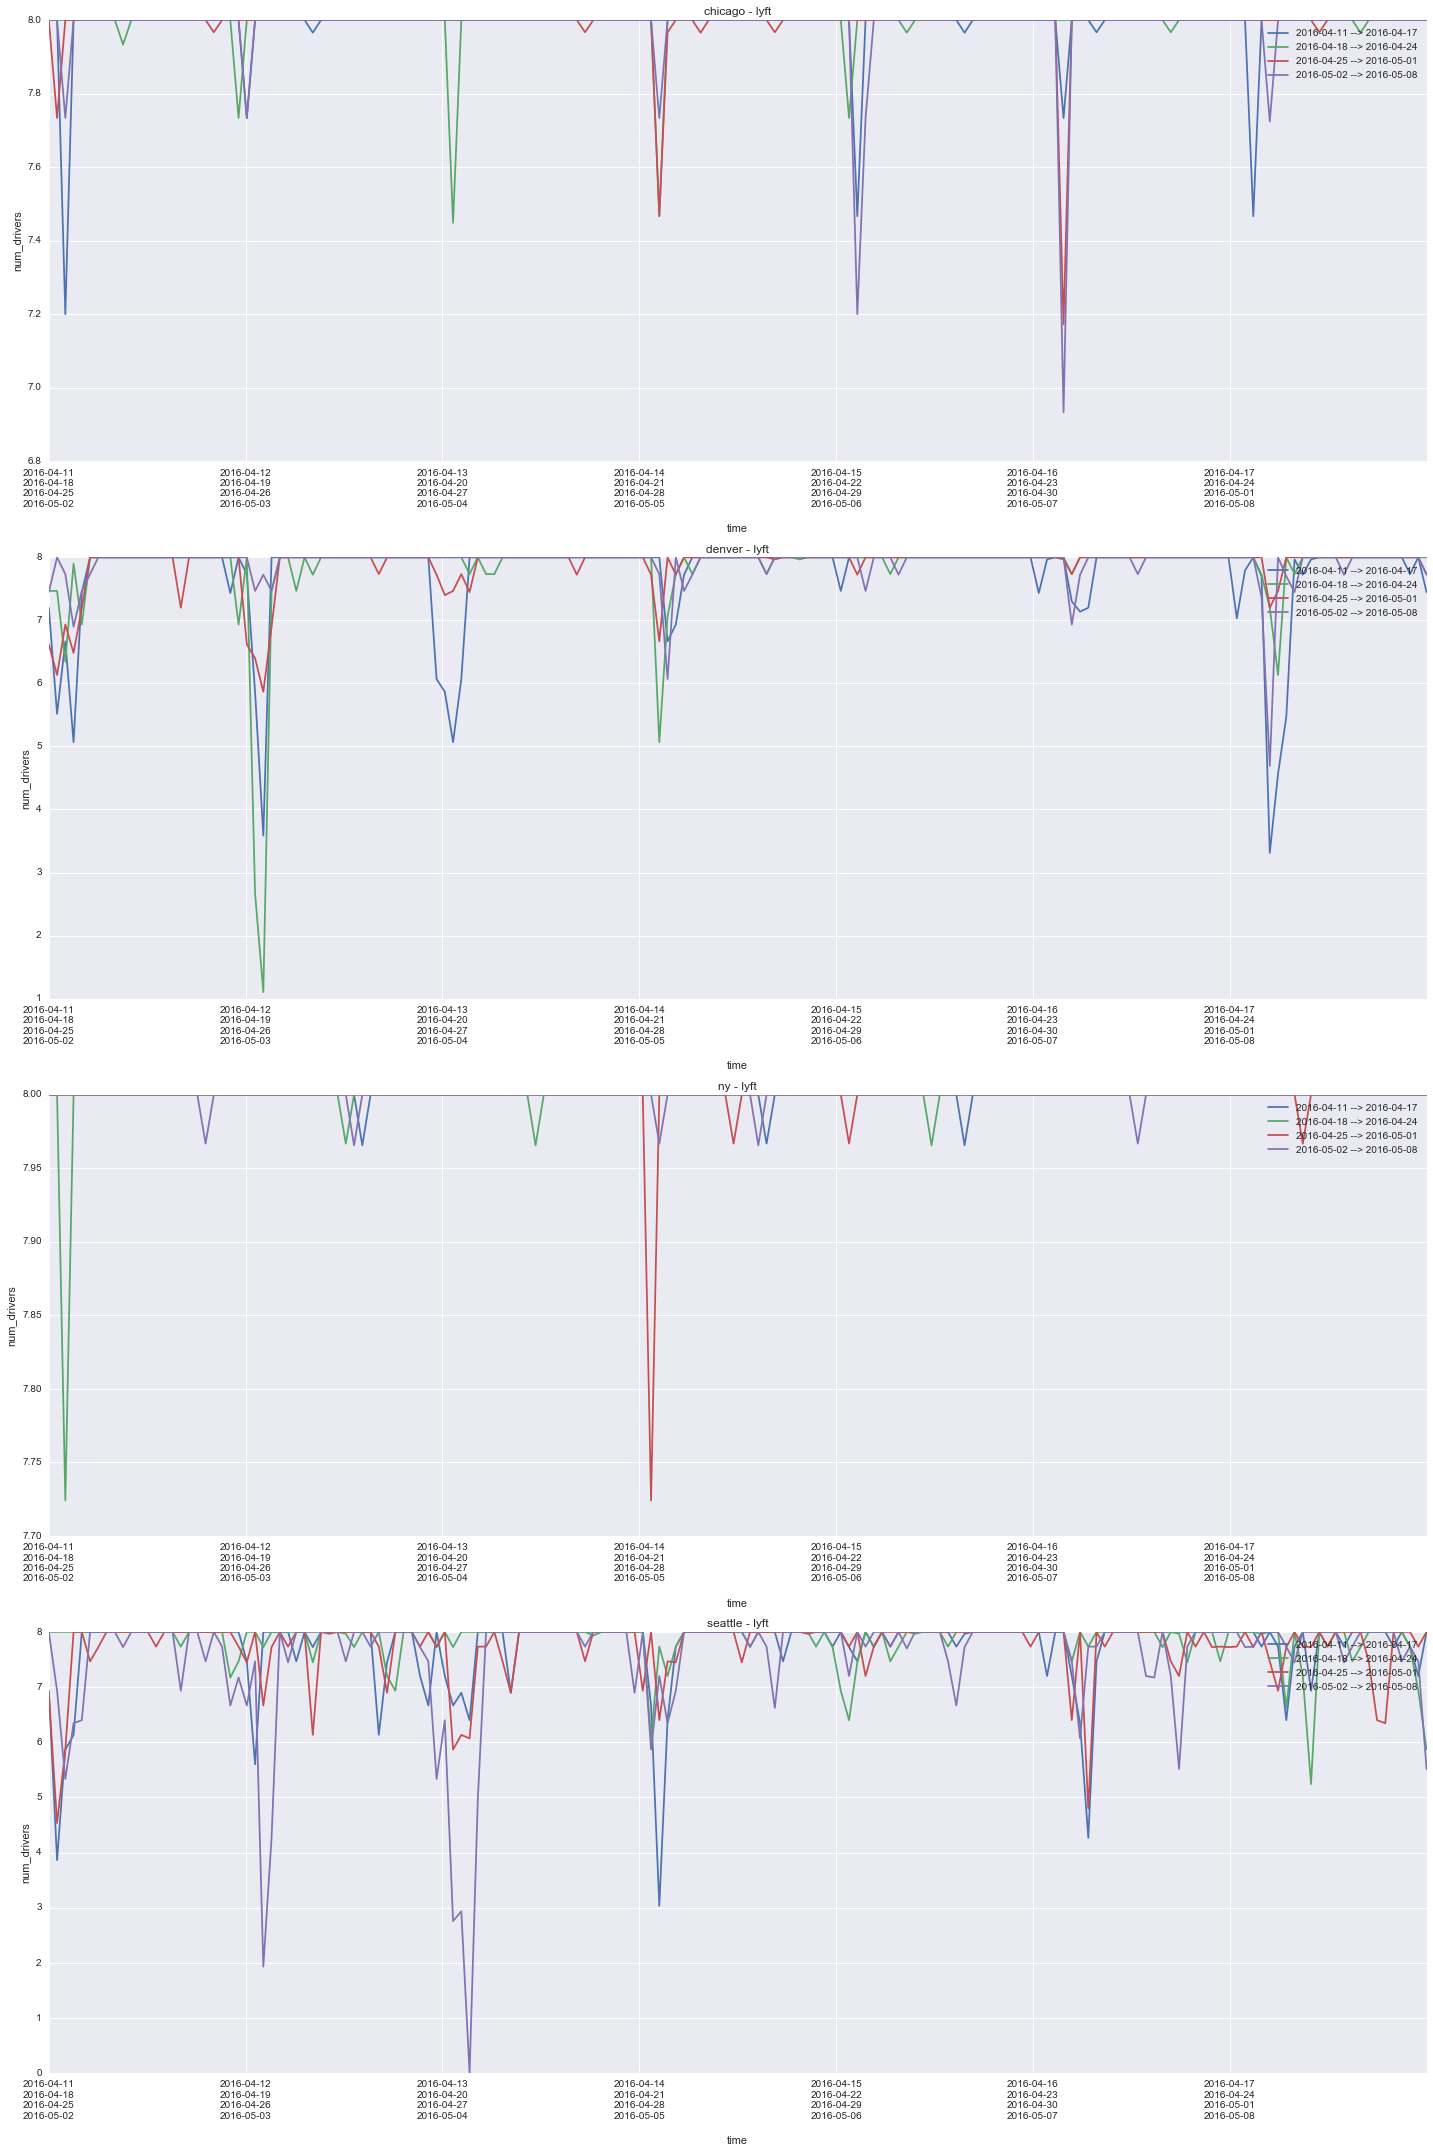

In [26]:
from collections import defaultdict

cities = lyft['city'].unique().tolist()
wkly_dates = [('2016-04-11','2016-04-17'), ('2016-04-18','2016-04-24'), 
              ('2016-04-25','2016-05-01'), ('2016-05-02','2016-05-08')]
agg_wkly_dates = defaultdict(str)
ridetypes = lyft['ride_type'].unique().tolist()
fig, ax = plt.subplots(4,1, figsize=(20,30))
for i, axs in enumerate(ax.reshape(4,)):
    for start, end in wkly_dates:
        data = lyft.query("city == @cities[@i] and ride_type == @ridetypes[0]").ix[start:end]
        axs.plot(data.reset_index()['num_drivers'], label='{} --> {}'.format(start,end))
        dates = np.unique(data.index.date)
        for j,date in enumerate(dates):
            if str(date) not in agg_wkly_dates[j]:
                agg_wkly_dates[j] += str(date) + '\n'
        axs.set_ylabel('num_drivers')
        axs.set_xlabel('time')
        start, end = axs.get_xlim()
        stepsize = end / dates.shape[0]
        axs.set_xticks(np.arange(start, end, stepsize))
        axs.set_xticklabels(agg_wkly_dates.values())
        axs.legend(loc='upper right')
        axs.set_title('{} - {}'.format(cities[i], ridetypes[0]))
plt.tight_layout()

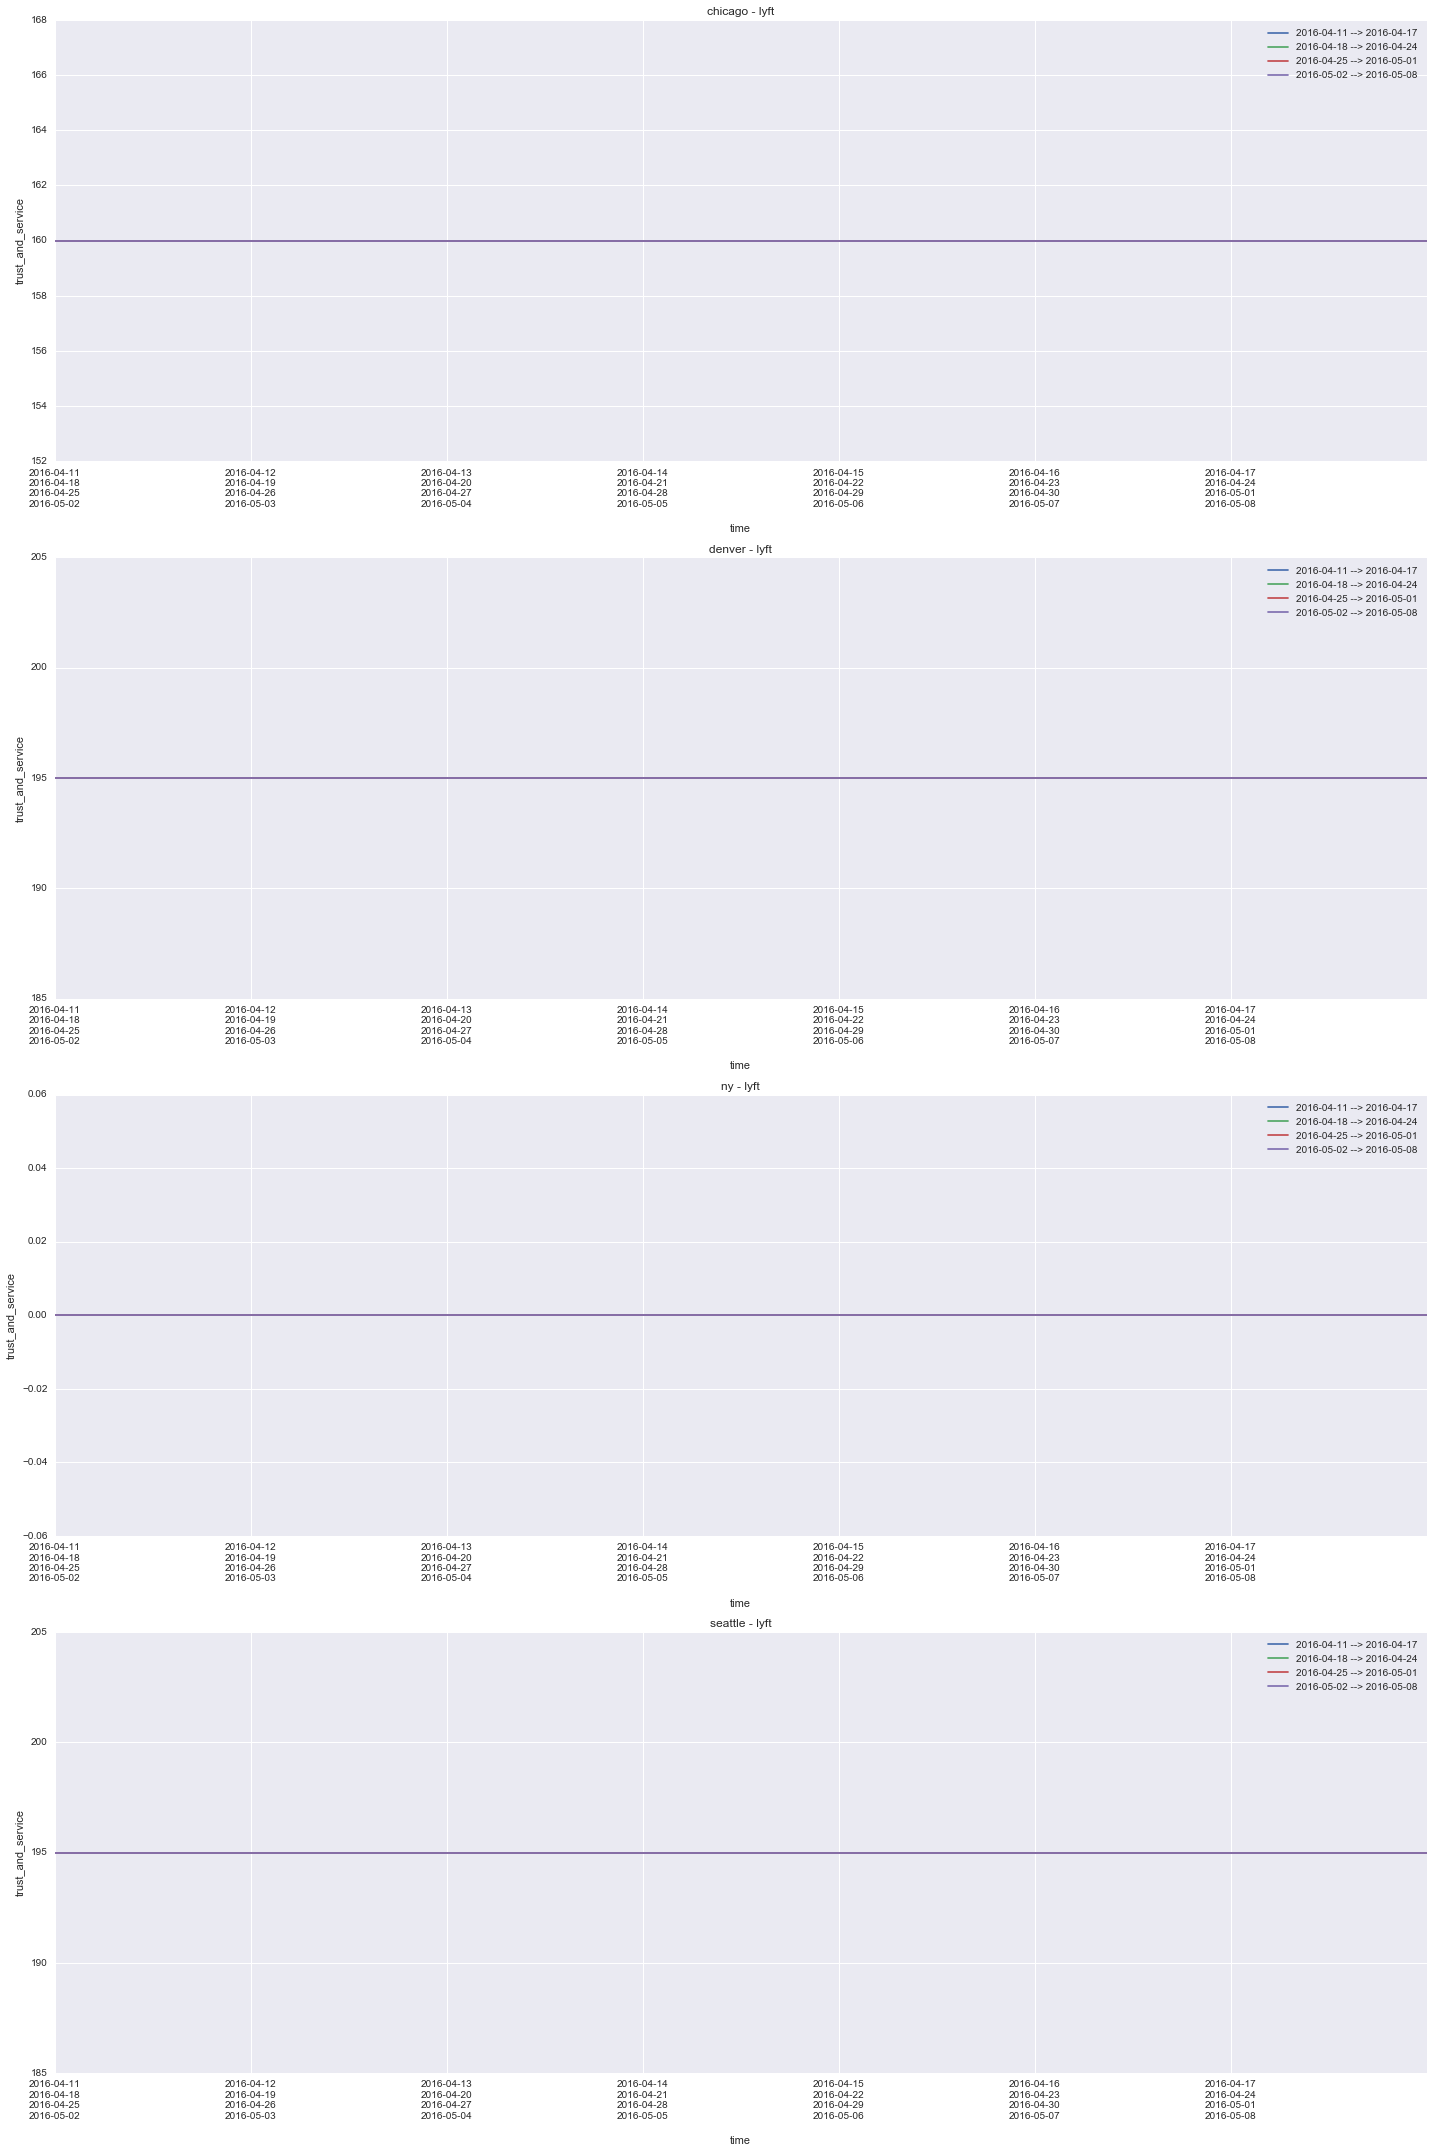

In [28]:
from collections import defaultdict

cities = lyft['city'].unique().tolist()
wkly_dates = [('2016-04-11','2016-04-17'), ('2016-04-18','2016-04-24'), 
              ('2016-04-25','2016-05-01'), ('2016-05-02','2016-05-08')]
agg_wkly_dates = defaultdict(str)
ridetypes = lyft['ride_type'].unique().tolist()
fig, ax = plt.subplots(4,1, figsize=(20,30))
for i, axs in enumerate(ax.reshape(4,)):
    for start, end in wkly_dates:
        data = lyft.query("city == @cities[@i] and ride_type == @ridetypes[0]").ix[start:end]
        axs.plot(data.reset_index()['trust_and_service'], label='{} --> {}'.format(start,end))
        dates = np.unique(data.index.date)
        for j,date in enumerate(dates):
            if str(date) not in agg_wkly_dates[j]:
                agg_wkly_dates[j] += str(date) + '\n'
        axs.set_ylabel('trust_and_service')
        axs.set_xlabel('time')
        start, end = axs.get_xlim()
        stepsize = end / dates.shape[0]
        axs.set_xticks(np.arange(start, end, stepsize))
        axs.set_xticklabels(agg_wkly_dates.values())
        axs.legend(loc='upper right')
        axs.set_title('{} - {}'.format(cities[i], ridetypes[0]))
plt.tight_layout()

In [ ]:
fs = ['date', 'hour', 'city', 'ride_type', 'avg_est_price', 
 'estimated_cost_cents_min', 'estimated_cost_cents_max', 
 'estimated_distance_miles', 'estimated_duration_seconds', 
 'eta_seconds', 'base_charge', 'cost_minimum', 'cost_per_mile', 
 'cost_per_minute', 'cancel_penalty_amount', 'num_drivers', 'seats', 
 'trust_and_service', 'start_latitude', 'start_longitude', 'stop_latitude', 
 'stop_longitude', 'dayofweek', 'weekofyear']

In [23]:
fs = ['avg_est_price','estimated_distance_miles', 'estimated_duration_seconds', 
 'eta_seconds','base_charge', 'cost_minimum', 'cost_per_mile', 'cost_per_minute', 
      'cancel_penalty_amount', 'num_drivers', 'seats', 
      'trust_and_service', 'start_latitude', 'start_longitude', 'stop_latitude', 
 'stop_longitude', 'dayofweek', 'weekofyear']

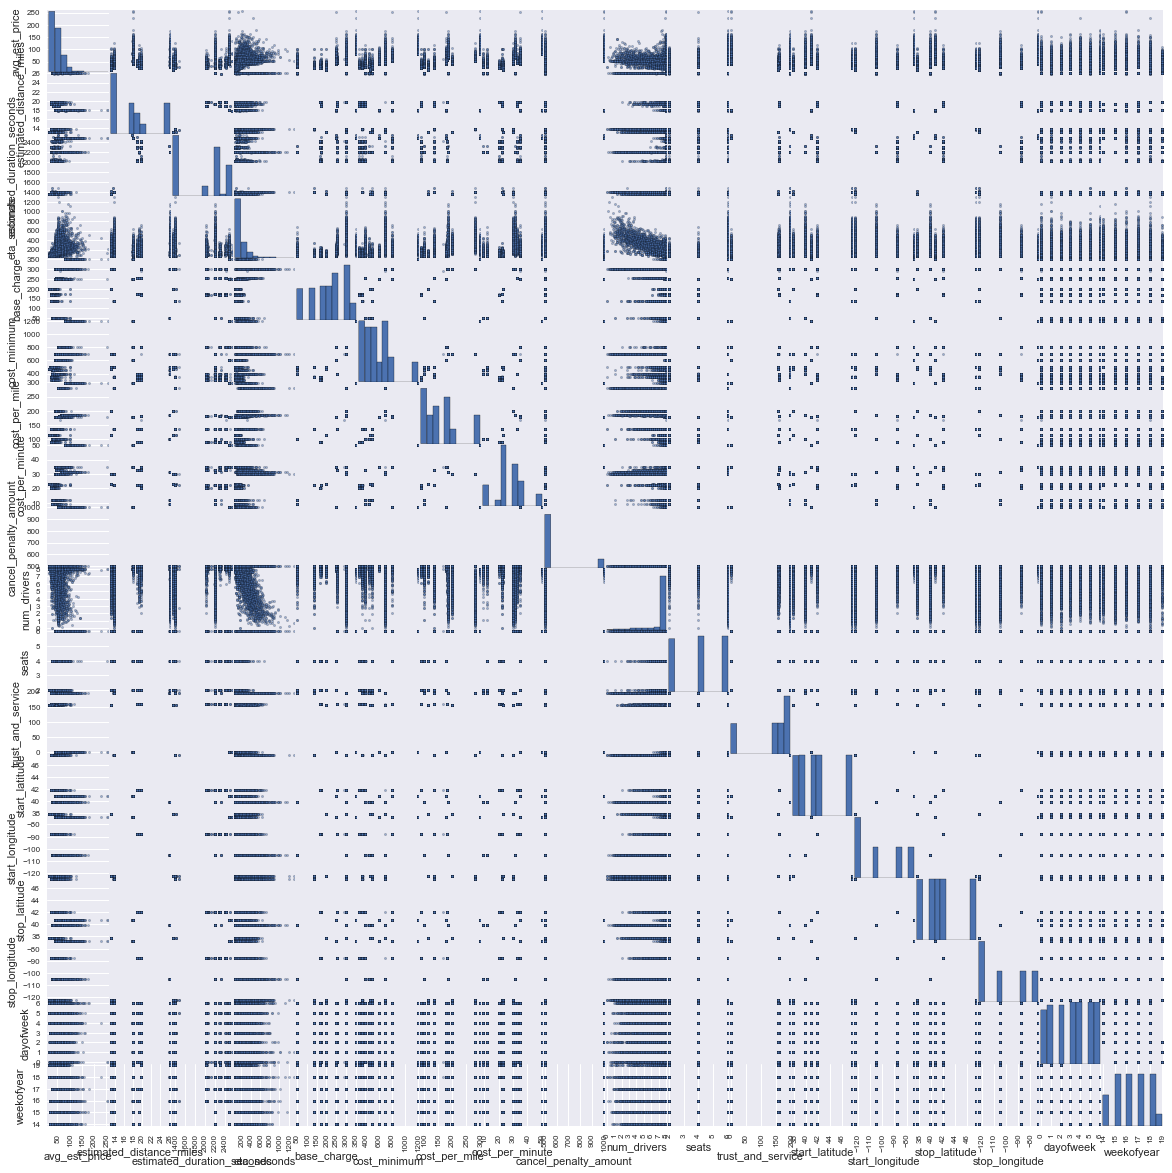

In [25]:
pd.scatter_matrix(lyft[fs], figsize=(20,20));